# Generate Background Images for `ev3devsim` Robot Simulator

Simple routes for generating png files for use in `ev3devsim` robot simulator.

Image size: width 2362px, height 1143px.

*Could be useful to support interactive canvas drawing of backgrounds too?*

In [1]:
from IPython.display import Image as I
from PIL import Image, ImageDraw

mode = 'RGB'
size = (2362, 1143)
color = 'white'

## Blank Image

In [25]:
filename = '_blank.png'

img = Image.new(mode, size, color)
img.save(filename)

## Greys

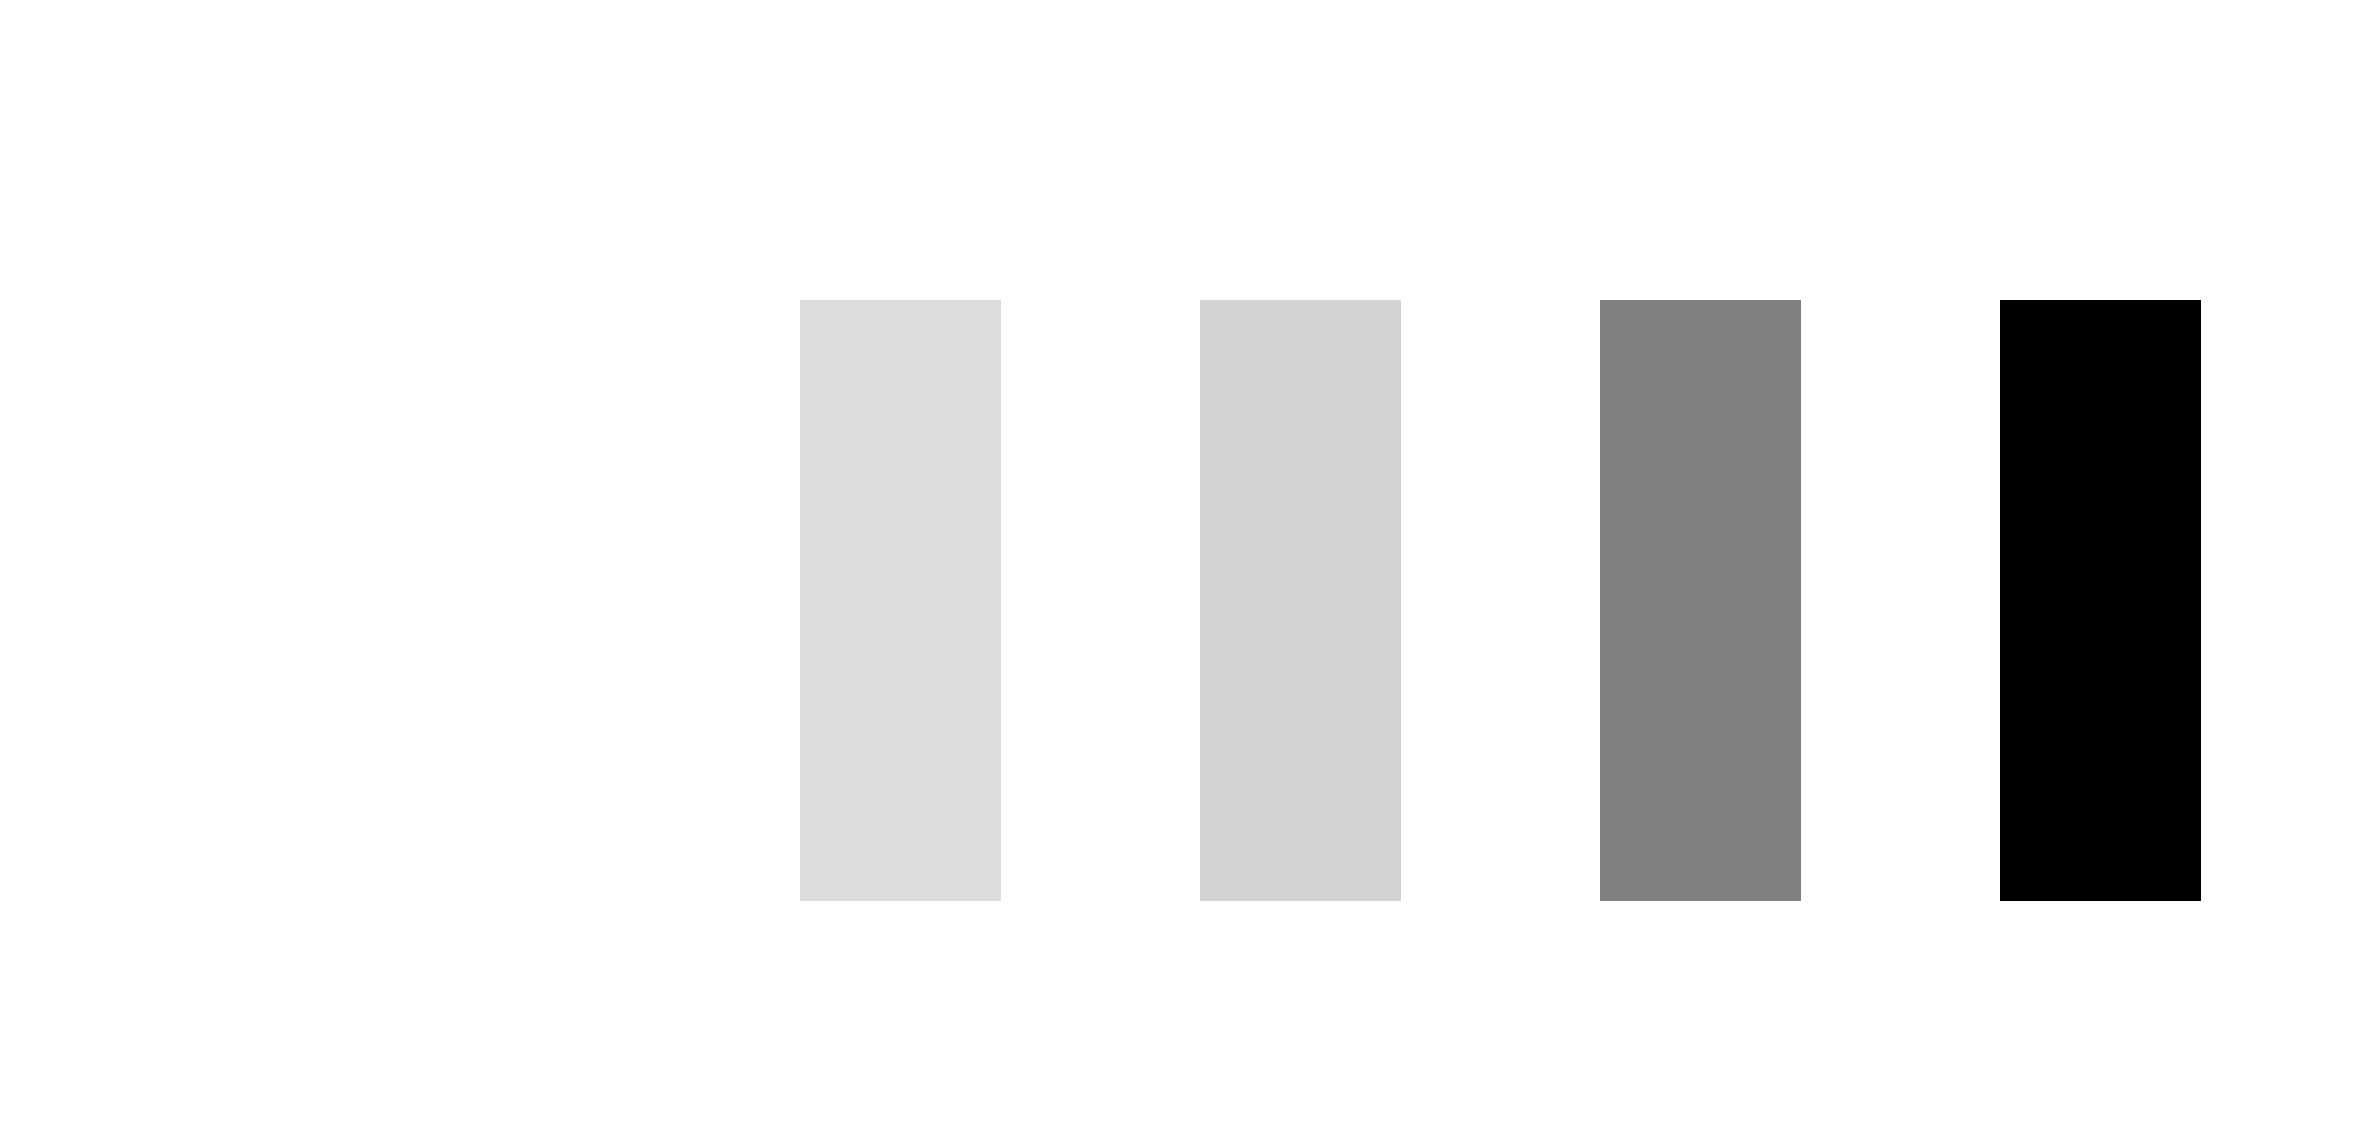

In [26]:
filename = '_greys.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

draw.rectangle([(800, 300), (1000, 900)], fill='gainsboro')
draw.rectangle([(1200, 300), (1400, 900)], fill='lightgrey')
draw.rectangle([(1600, 300), (1800, 900)], fill='grey')
draw.rectangle([(2000, 300), (2200, 900)], fill='black')
img.save(filename)
I(filename)

## Grey and Black

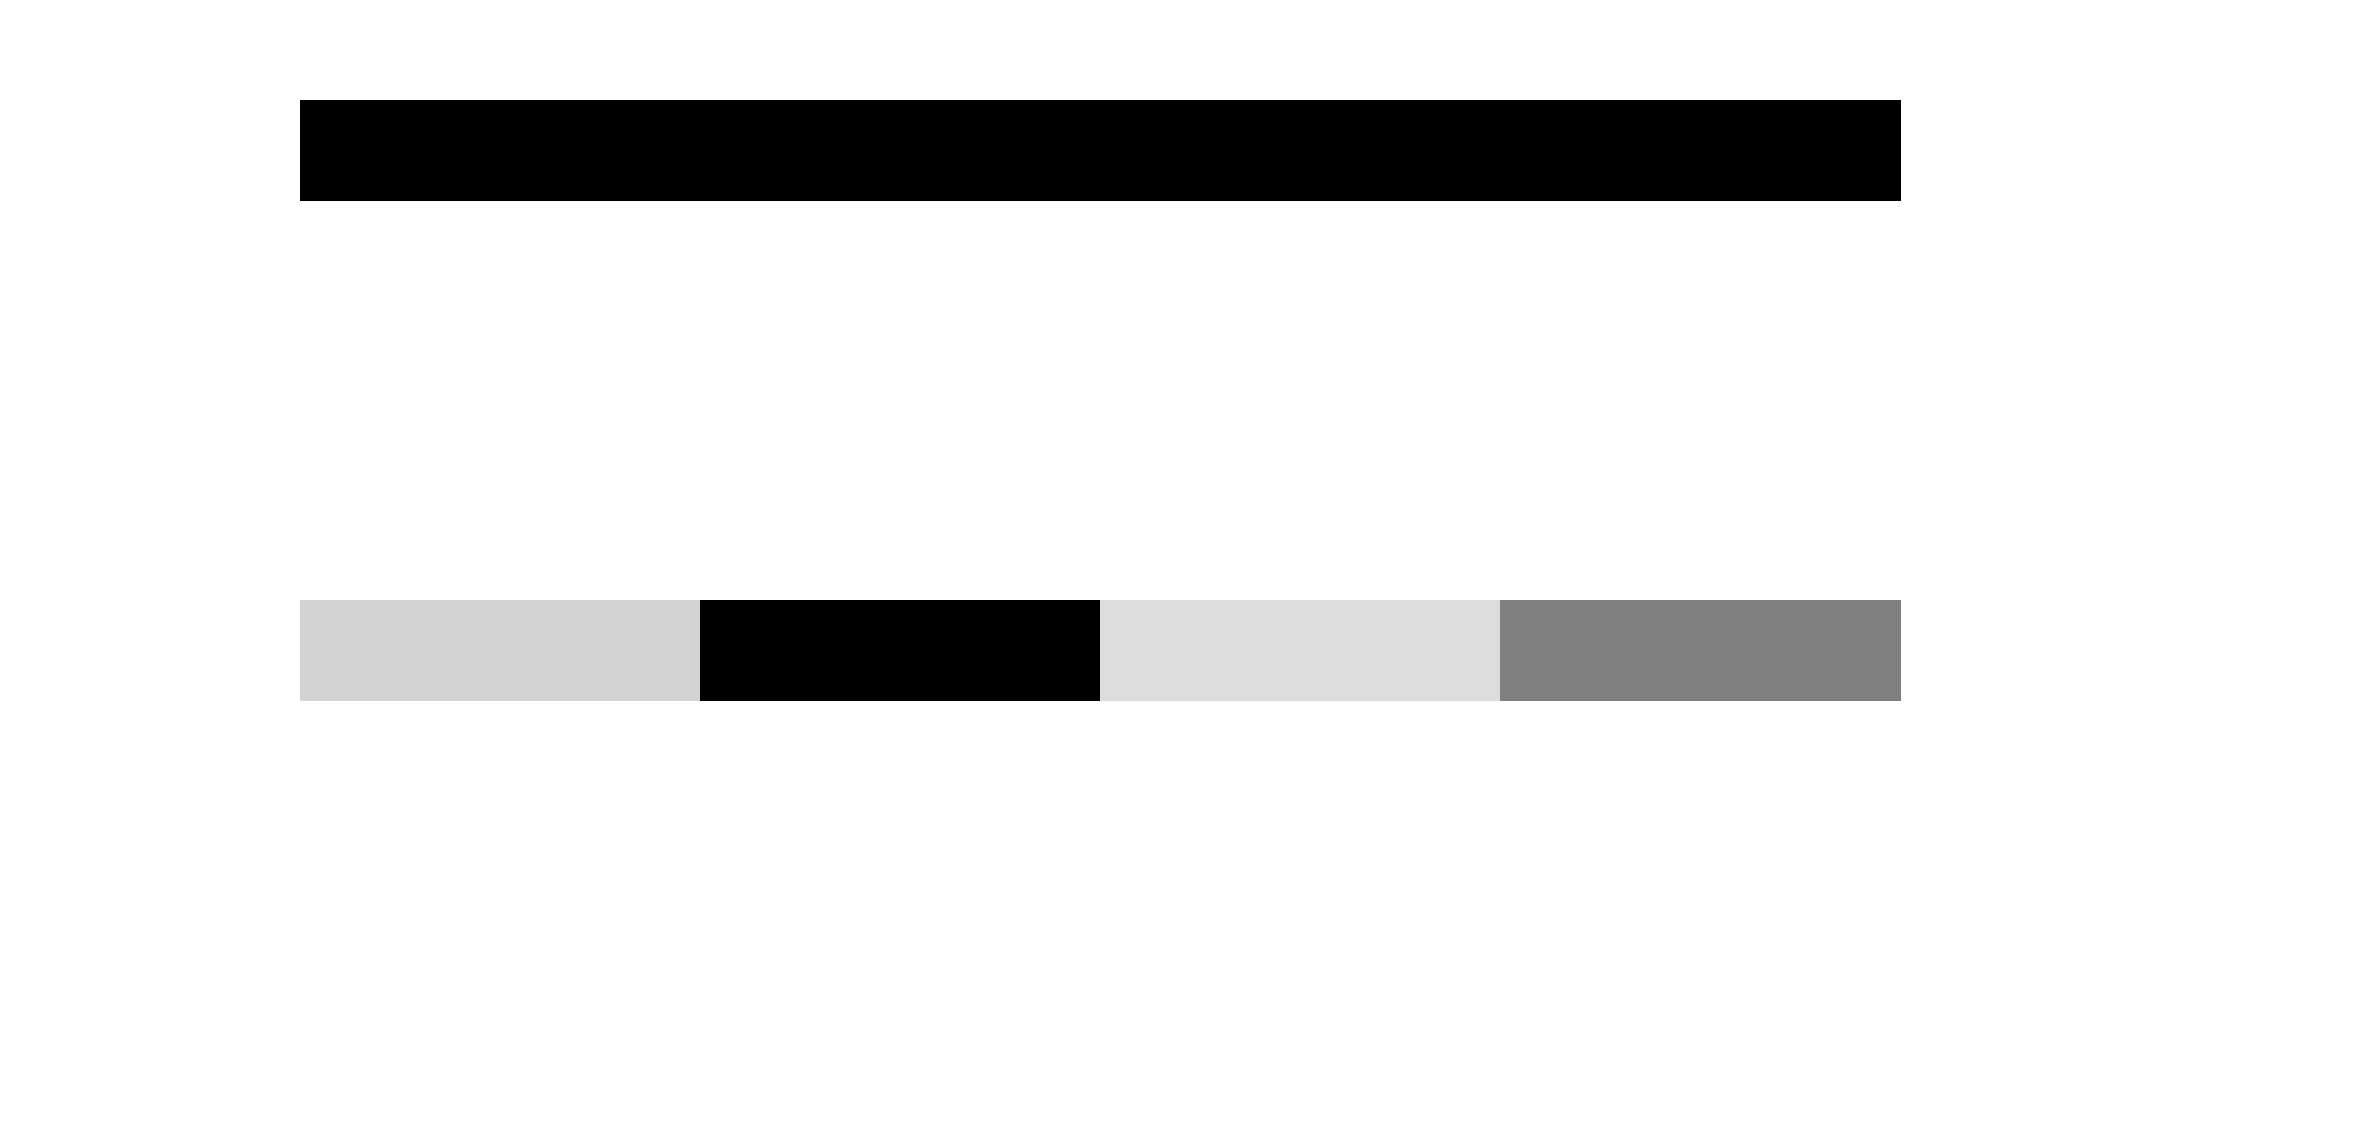

In [27]:
filename = '_grey_and_black.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

striped_band = 600
long_band = 100
band_height = 100

left_origin = 300
band_width = 400

#Black band
draw.rectangle([(left_origin, long_band), (left_origin + 4 * band_width, long_band + band_height)], fill='black')

#Light grey / black / grey band
draw.rectangle([(left_origin, striped_band), (left_origin + band_width, striped_band + band_height)], fill='lightgrey')
draw.rectangle([(left_origin + band_width, striped_band), (left_origin + 2 * band_width, striped_band + band_height)], fill='black')
draw.rectangle([(left_origin + 2 * band_width, striped_band), (left_origin + 3 * band_width, striped_band + band_height)], fill='gainsboro')
draw.rectangle([(left_origin + 3 * band_width, striped_band), (left_origin + 4 * band_width, striped_band + band_height)], fill='grey')

img.save(filename)
I(filename)

## Square

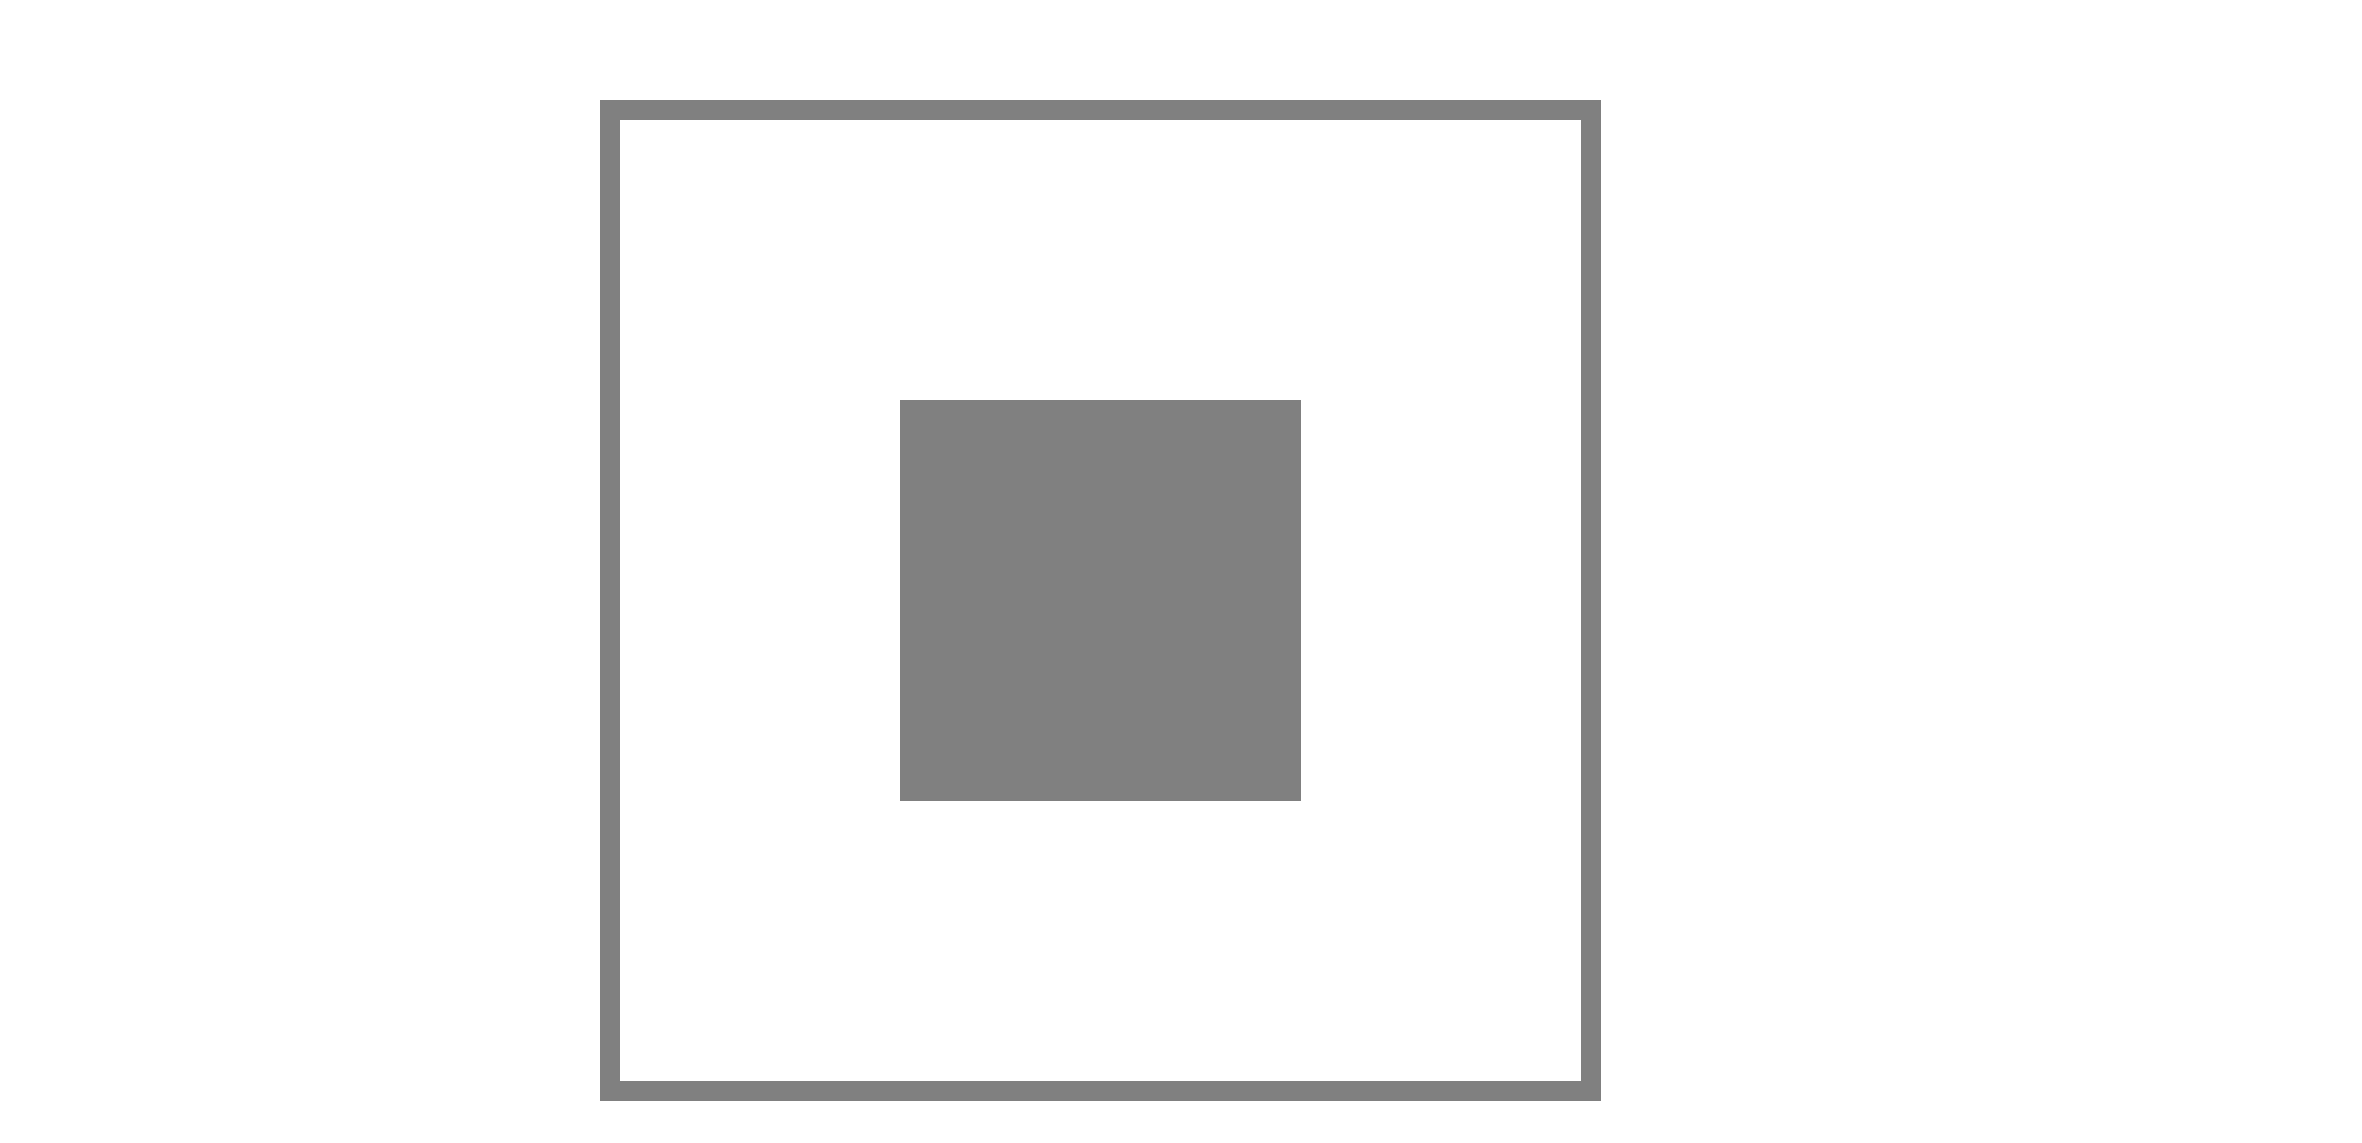

In [28]:
filename = '_square.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

draw.rectangle([(900, 400), (1300, 800)], fill='grey')
  
draw.rectangle([(600, 100), (1600, 1100)], outline ="grey", width=20) 

img.save(filename)
I(filename)

## Loop

In [29]:
#https://stackoverflow.com/a/50145023/454773

def rounded_rectangle(self: ImageDraw, xy, corner_radius, fill=None, outline=None):
    upper_left_point = xy[0]
    bottom_right_point = xy[1]
    self.rectangle(
        [
            (upper_left_point[0], upper_left_point[1] + corner_radius),
            (bottom_right_point[0], bottom_right_point[1] - corner_radius)
        ],
        fill=fill,
        outline=outline
    )
    self.rectangle(
        [
            (upper_left_point[0] + corner_radius, upper_left_point[1]),
            (bottom_right_point[0] - corner_radius, bottom_right_point[1])
        ],
        fill=fill,
        outline=outline
    )
    self.pieslice([upper_left_point, (upper_left_point[0] + corner_radius * 2, upper_left_point[1] + corner_radius * 2)],
        180,
        270,
        fill=fill,
        outline=outline
    )
    self.pieslice([(bottom_right_point[0] - corner_radius * 2, bottom_right_point[1] - corner_radius * 2), bottom_right_point],
        0,
        90,
        fill=fill,
        outline=outline
    )
    self.pieslice([(upper_left_point[0], bottom_right_point[1] - corner_radius * 2), (upper_left_point[0] + corner_radius * 2, bottom_right_point[1])],
        90,
        180,
        fill=fill,
        outline=outline
    )
    self.pieslice([(bottom_right_point[0] - corner_radius * 2, upper_left_point[1]), (bottom_right_point[0], upper_left_point[1] + corner_radius * 2)],
        270,
        360,
        fill=fill,
        outline=outline
    )


ImageDraw.rounded_rectangle = rounded_rectangle

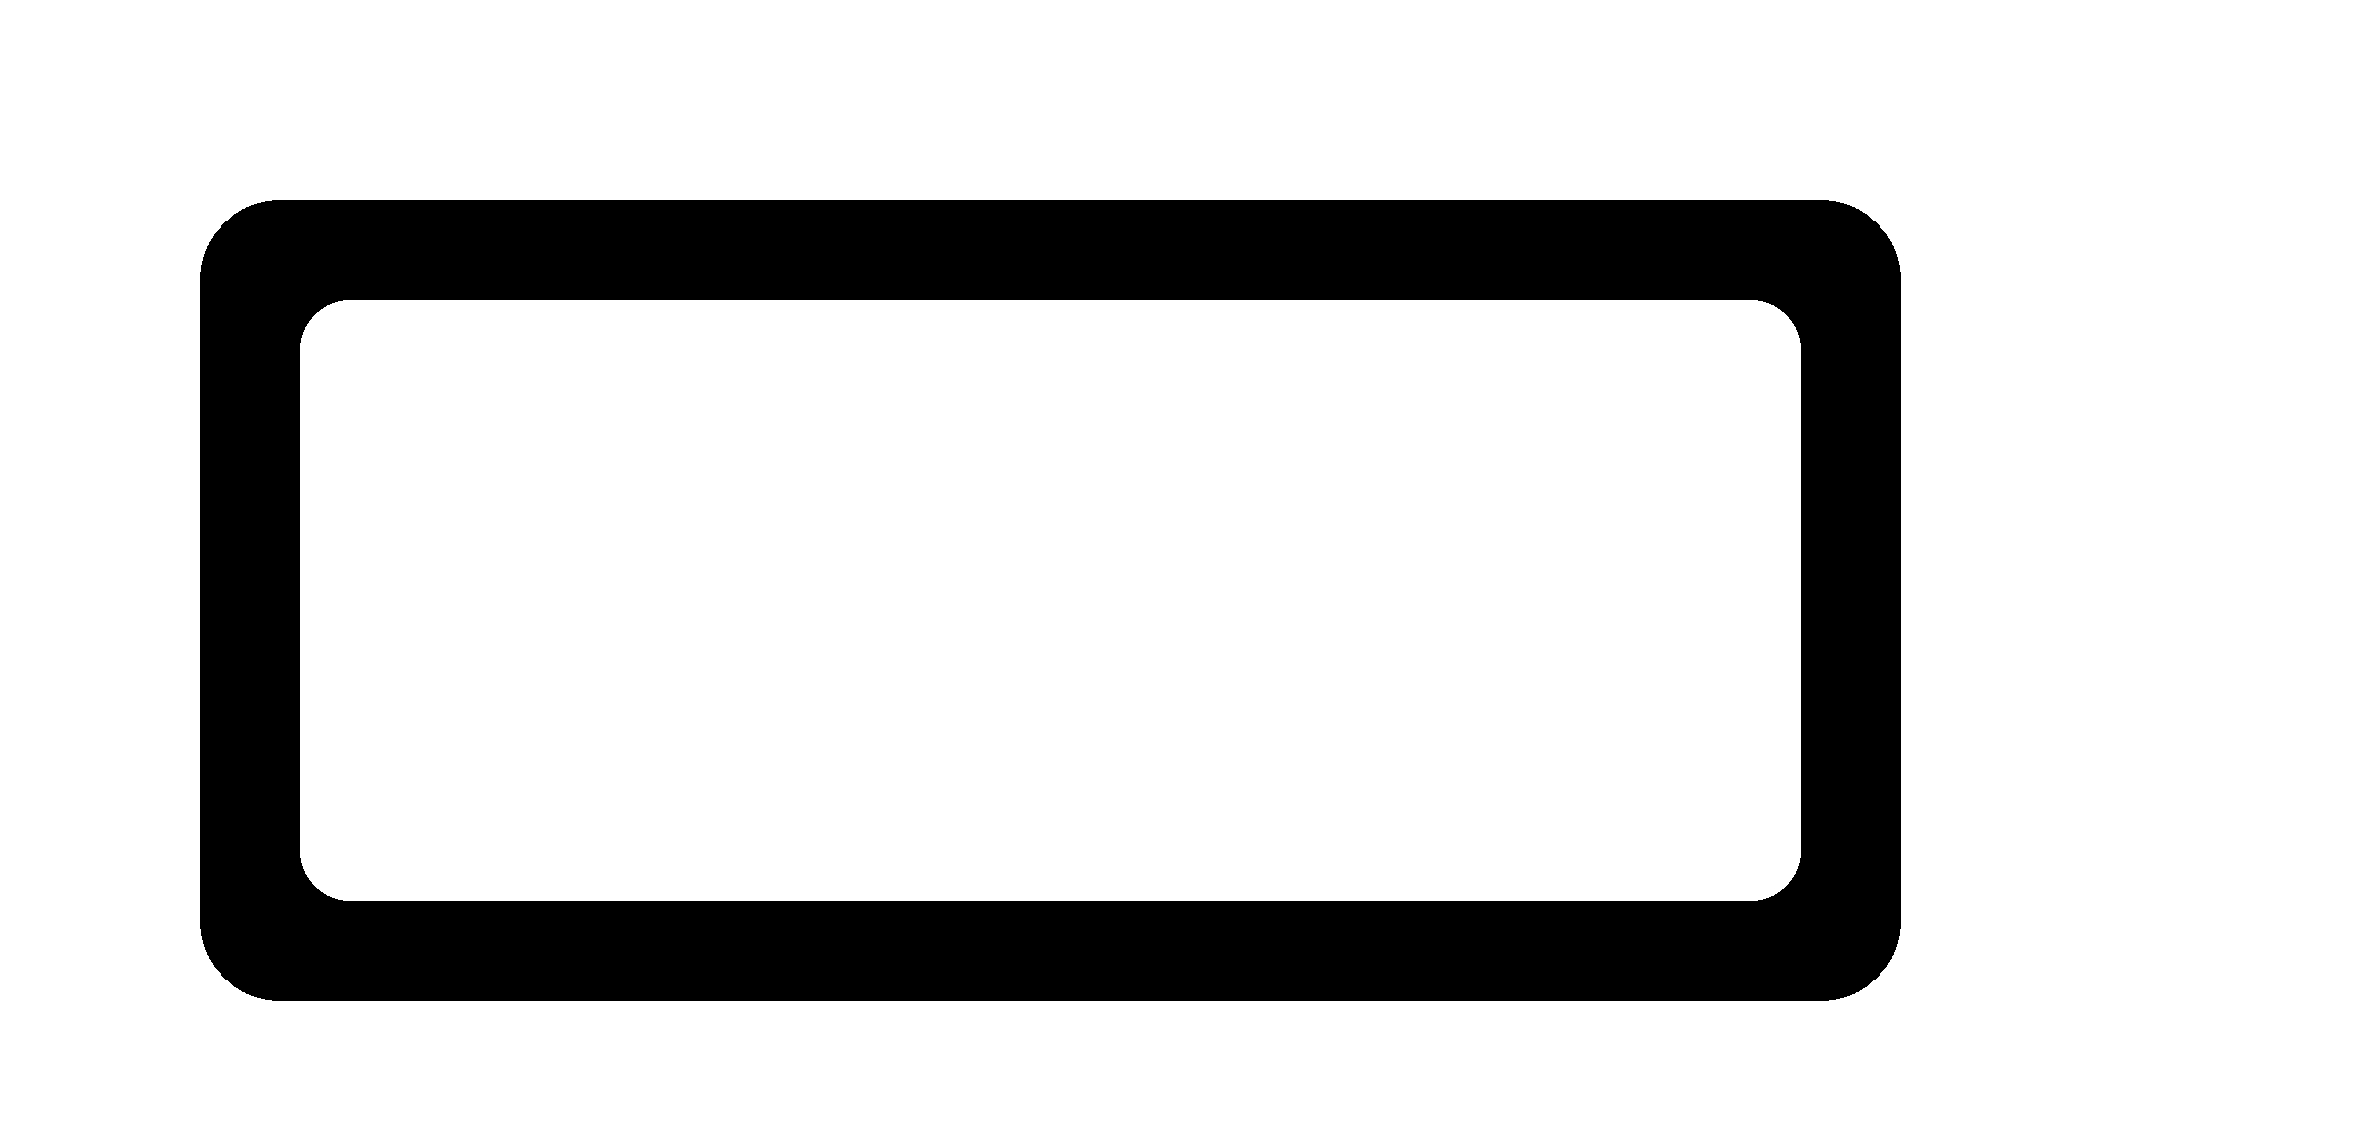

In [31]:
filename = '_loop.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

draw.rounded_rectangle([(200, 200), (1900, 1000)], 80, fill='black')
draw.rounded_rectangle([(300, 300), (1800, 900)], 50, fill='white')
img.save(filename)
I(filename)

## Radial Gradient (Braitenberg)

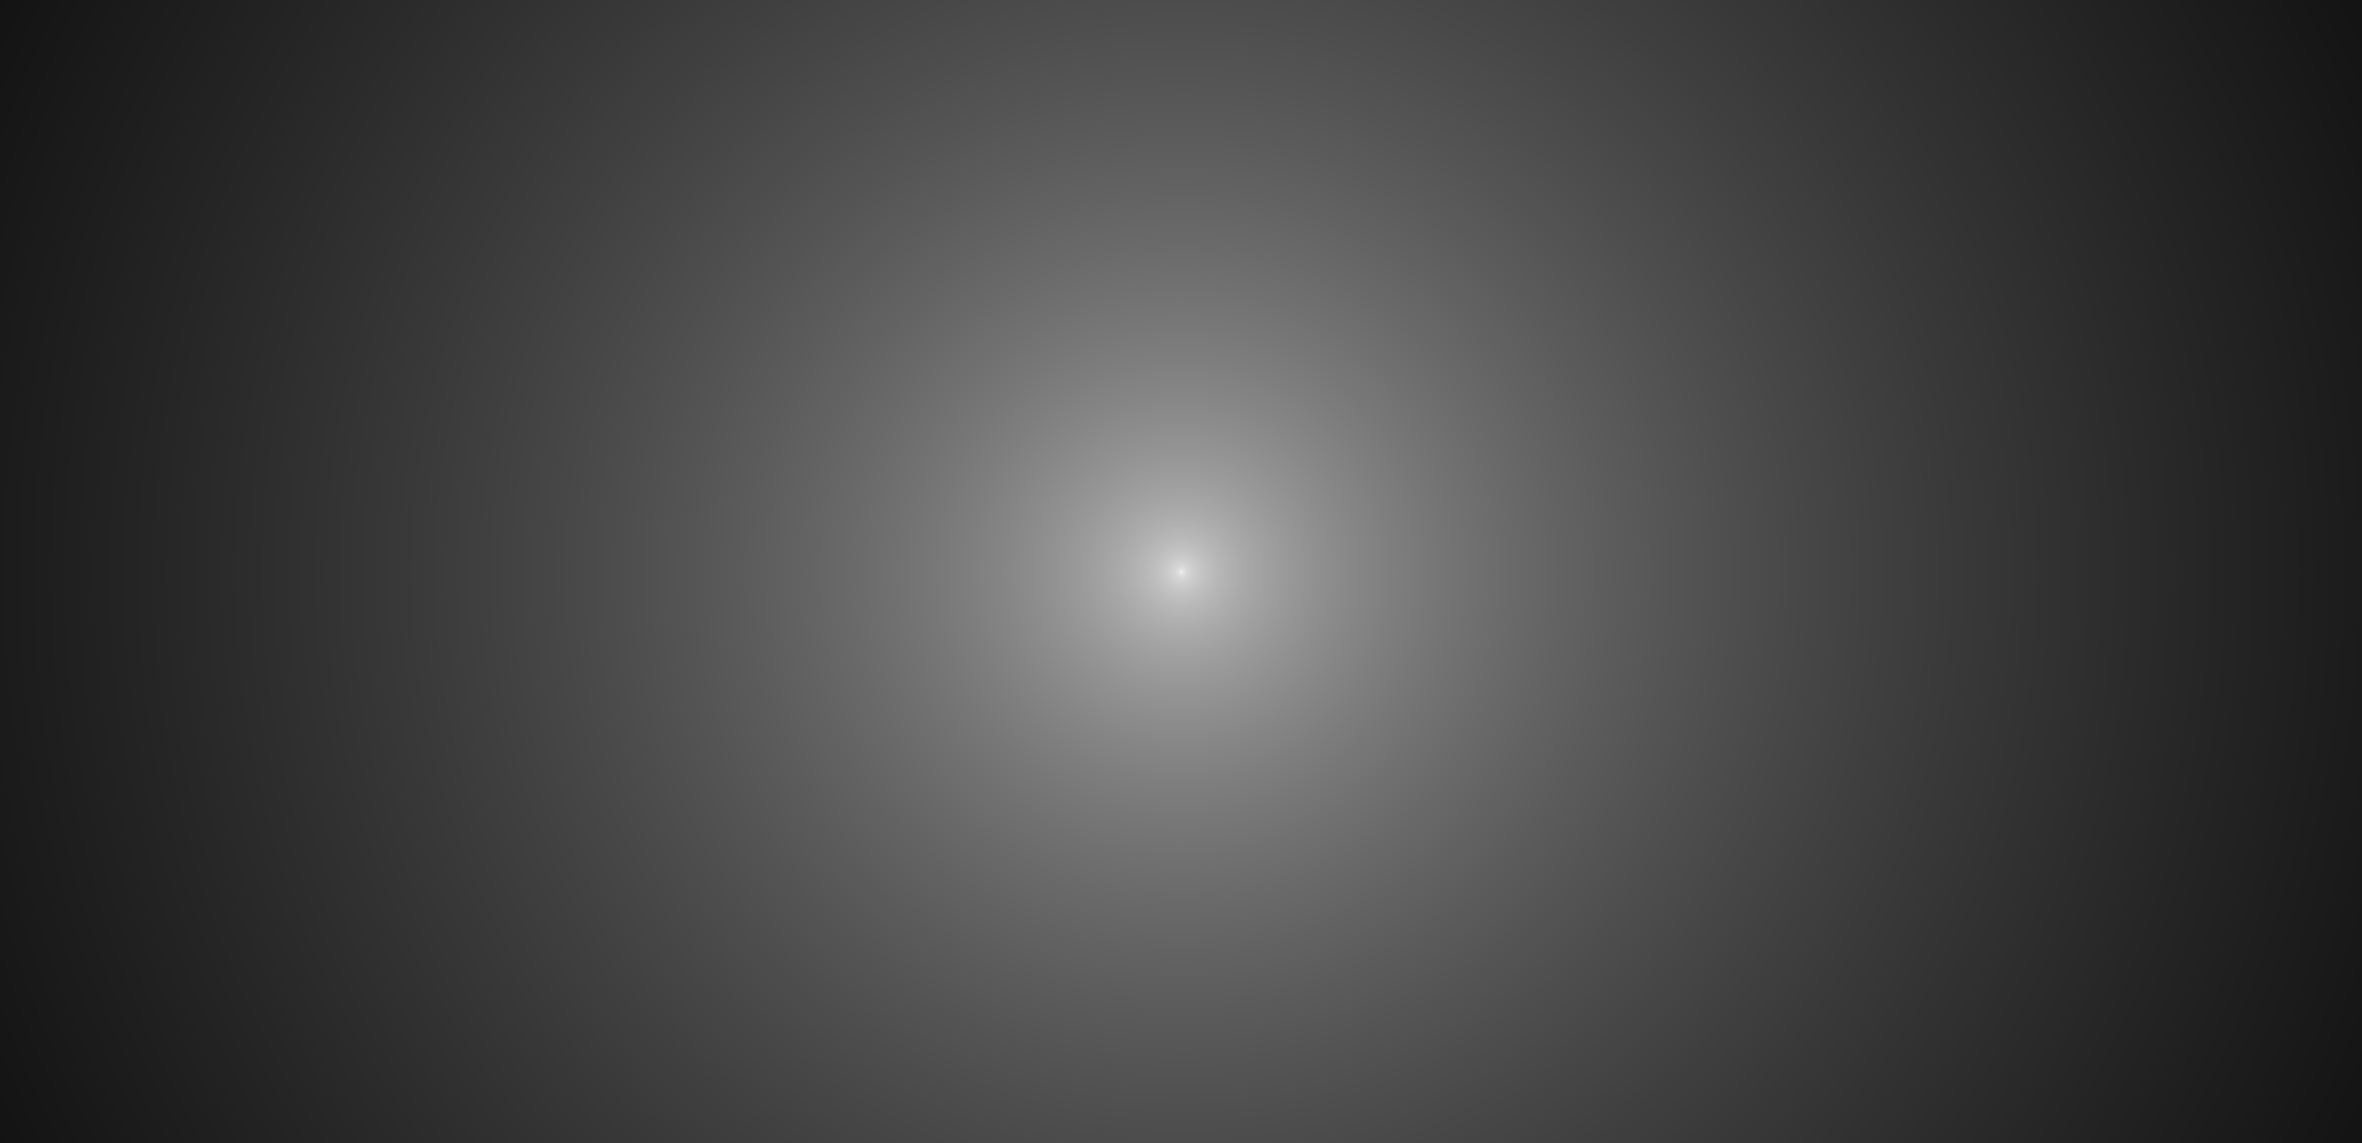

In [14]:
import math

img = Image.new(mode, size, color)


innerBlue = [80, 80, 255] #Color at the center
outerBlue = [0, 0, 80] #Color at the corners
blues = ('_radial_blue.png', innerBlue, outerBlue)

innerRed = [255, 80, 80] #Color at the center
outerRed = [80, 0, 0] #Color at the corners
reds = ('_radial_red.png', innerRed, outerRed)

innerGrey = [255, 255, 255] #Color at the center
outerGrey = [0, 0, 0] #Color at the corners
greys = ('_radial_grey.png', innerGrey, outerGrey)


#https://stackoverflow.com/a/30669765/454773
def radial(img, radial_config):
    """Gnerate a radial gradient image."""
    (filename, innerColor, outerColor) = radial_config
    for y in range(size[1]):
        for x in range(size[0]):

            #Find the distance to the center
            distanceToCenter = math.sqrt((x - size[0]/2) ** 2 + (y - size[1]/2) ** 2)

            #Make it on a scale from 0 to 1
            distanceToCenter = float(distanceToCenter) / (math.sqrt(2) * size[0]/2)

            #Make non-linear
            #distanceToCenter = math.sqrt(distanceToCenter)
            distanceToCenter = distanceToCenter**(1./3.)
            
            #Calculate r, g, and b values
            r = outerColor[0] * distanceToCenter + innerColor[0] * (1 - distanceToCenter)
            g = outerColor[1] * distanceToCenter + innerColor[1] * (1 - distanceToCenter)
            b = outerColor[2] * distanceToCenter + innerColor[2] * (1 - distanceToCenter)

            #Place the pixel        
            img.putpixel((x, y), (int(r), int(g), int(b))) 
    
    img.save(filename)
    return filename, img

#filename, _ = radial(img, blues)
#filename, _ = radial(img, reds)
filename, _ = radial(img, greys)

I(filename)

## Line Follower

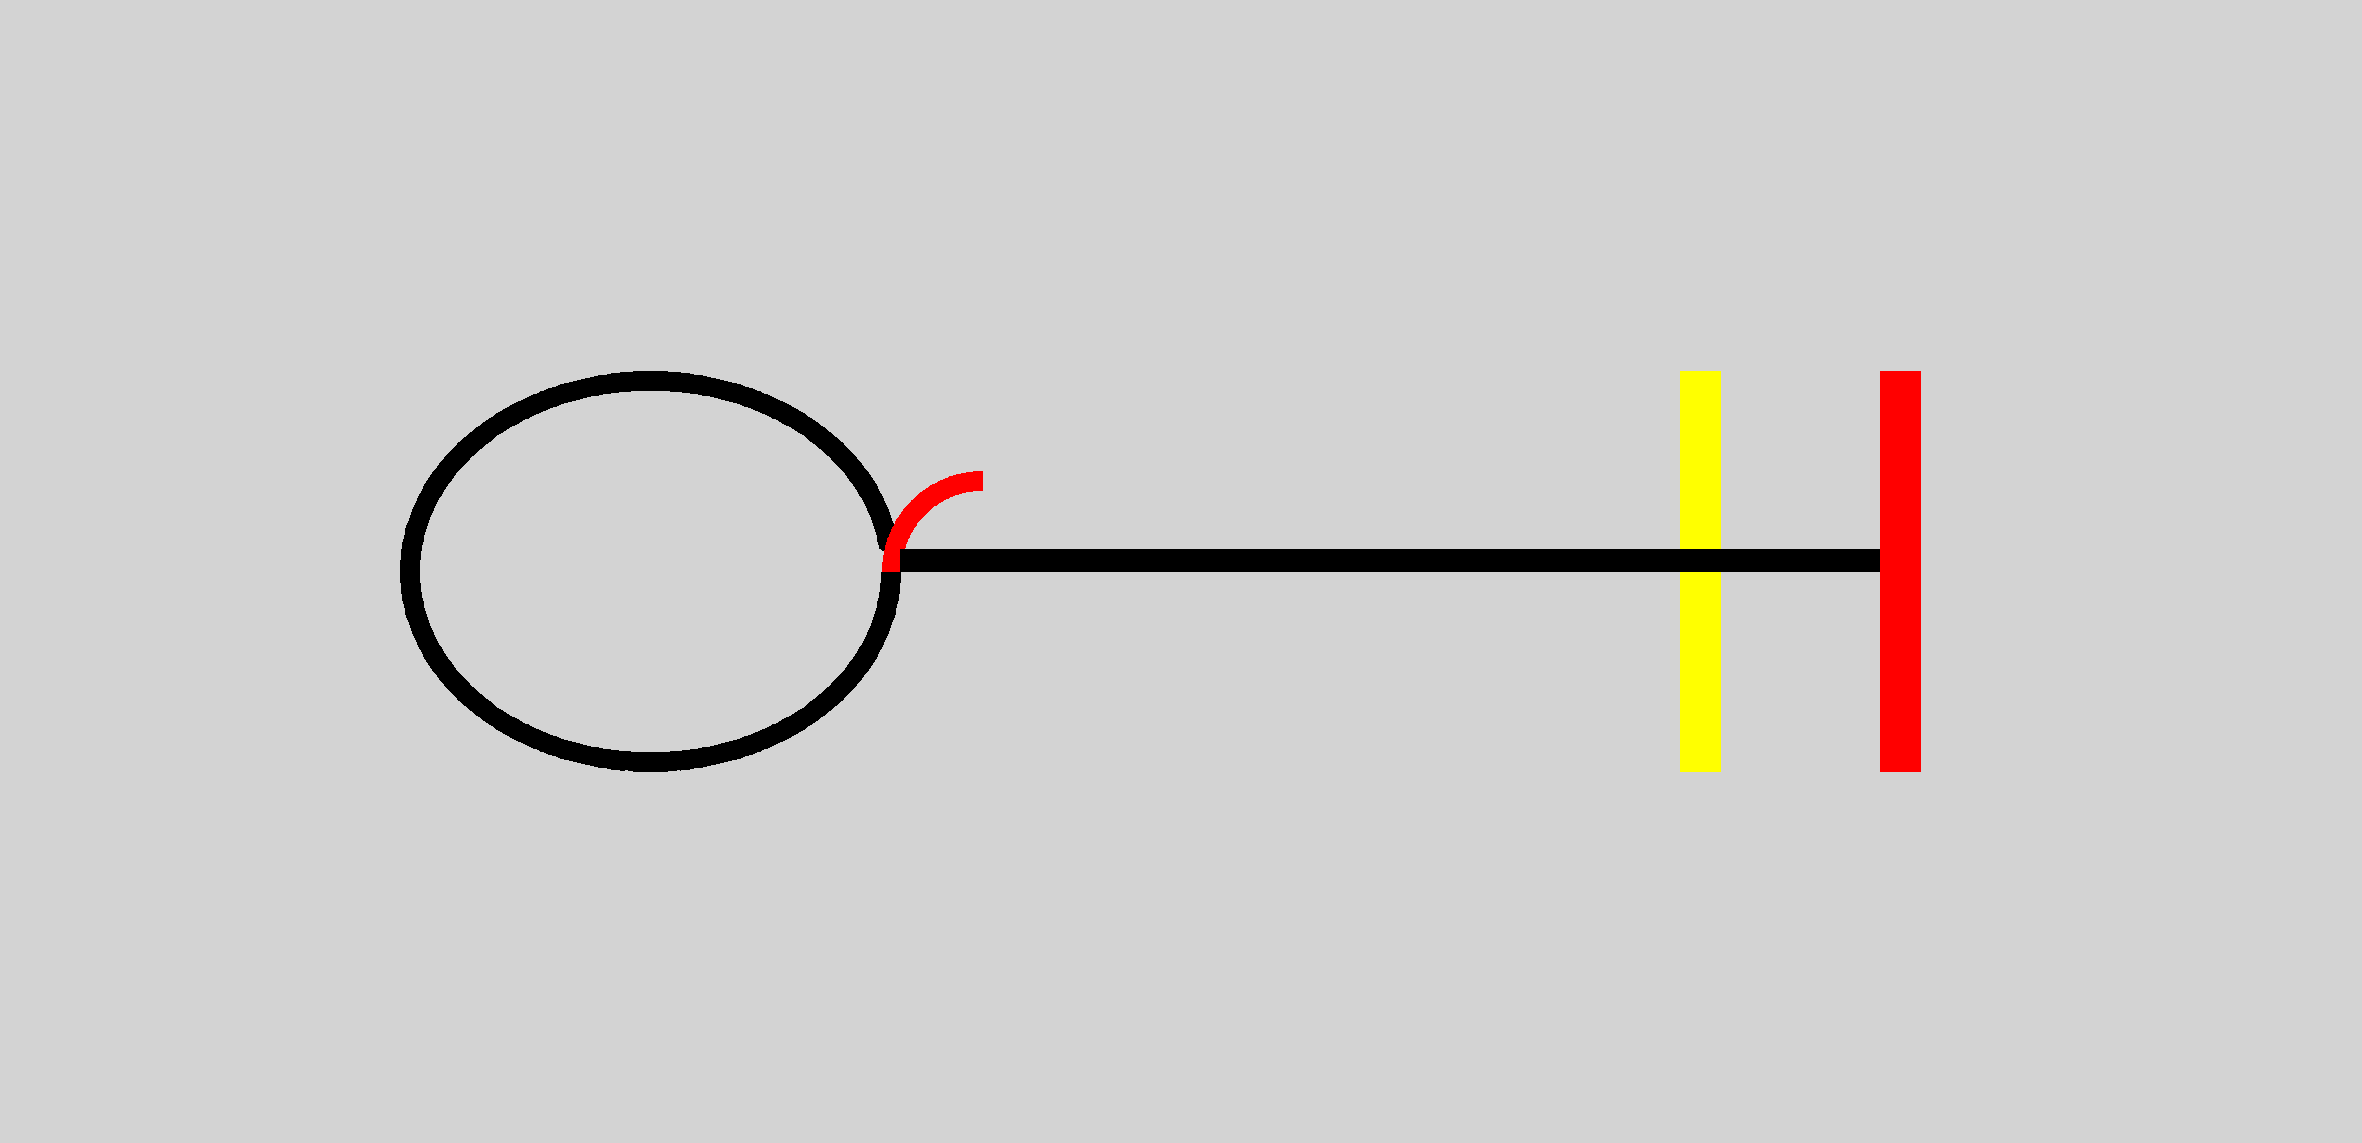

In [146]:
filename = '_line_follower_track.png'

img = Image.new(mode, size, 'lightgrey')
draw = ImageDraw.Draw(img)

x, y =  img.size
#Size of Bounding Box for ellipse
eX, eY = 1000, 400

inset = 400
outerBox =  (inset, y/2 - eY/2, inset + eX/2, y/2 + eY/2)
exitBox1 = (inset - 20 + eX/2, y/2 + -100, 4000 + eX/2, y/2 + 50 )
exitBox2 = (inset - 18 + eX/2, y/2 + -100, 4000 + eX/2, y/2 + 100 )

draw.ellipse(outerBox, outline ="black", width=20)
draw.rectangle((inset + eX/2 - 21, y/2 - 22, inset + eX/2 + 20, y/2), fill='lightgrey') 

# Arc: bounding box, start angle, end angle
draw.arc(exitBox1, start = 170, end = 180, width=20, fill ="black") 
draw.arc(exitBox2, start = 180, end = 190, width=20, fill ="black")
draw.arc((inset - 18 + eX/2, y/2 + -100, inset - 18 + eX/2 + 200, y/2 + 100 ),
         start = 180, end = 270, width=20, fill ="red")
# This needs fixing properly / relatively; maybe even some sums!
draw.rectangle((1700 - 20, y/2 - 200, 1700 + 20, y/2 + 200), fill ="yellow") 
draw.rectangle((inset + eX/2, y/2 - 22, 1900, y/2), fill ="black") 
draw.rectangle((1900 - 20, y/2 - 200, 1900 + 20, y/2 + 200), fill ="red") 

#draw.rectangle([(800, 300), (1000, 900)], fill='gainsboro')
img.save(filename)
I(filename)

Note: you may need to restart the kernel to use updated packages.


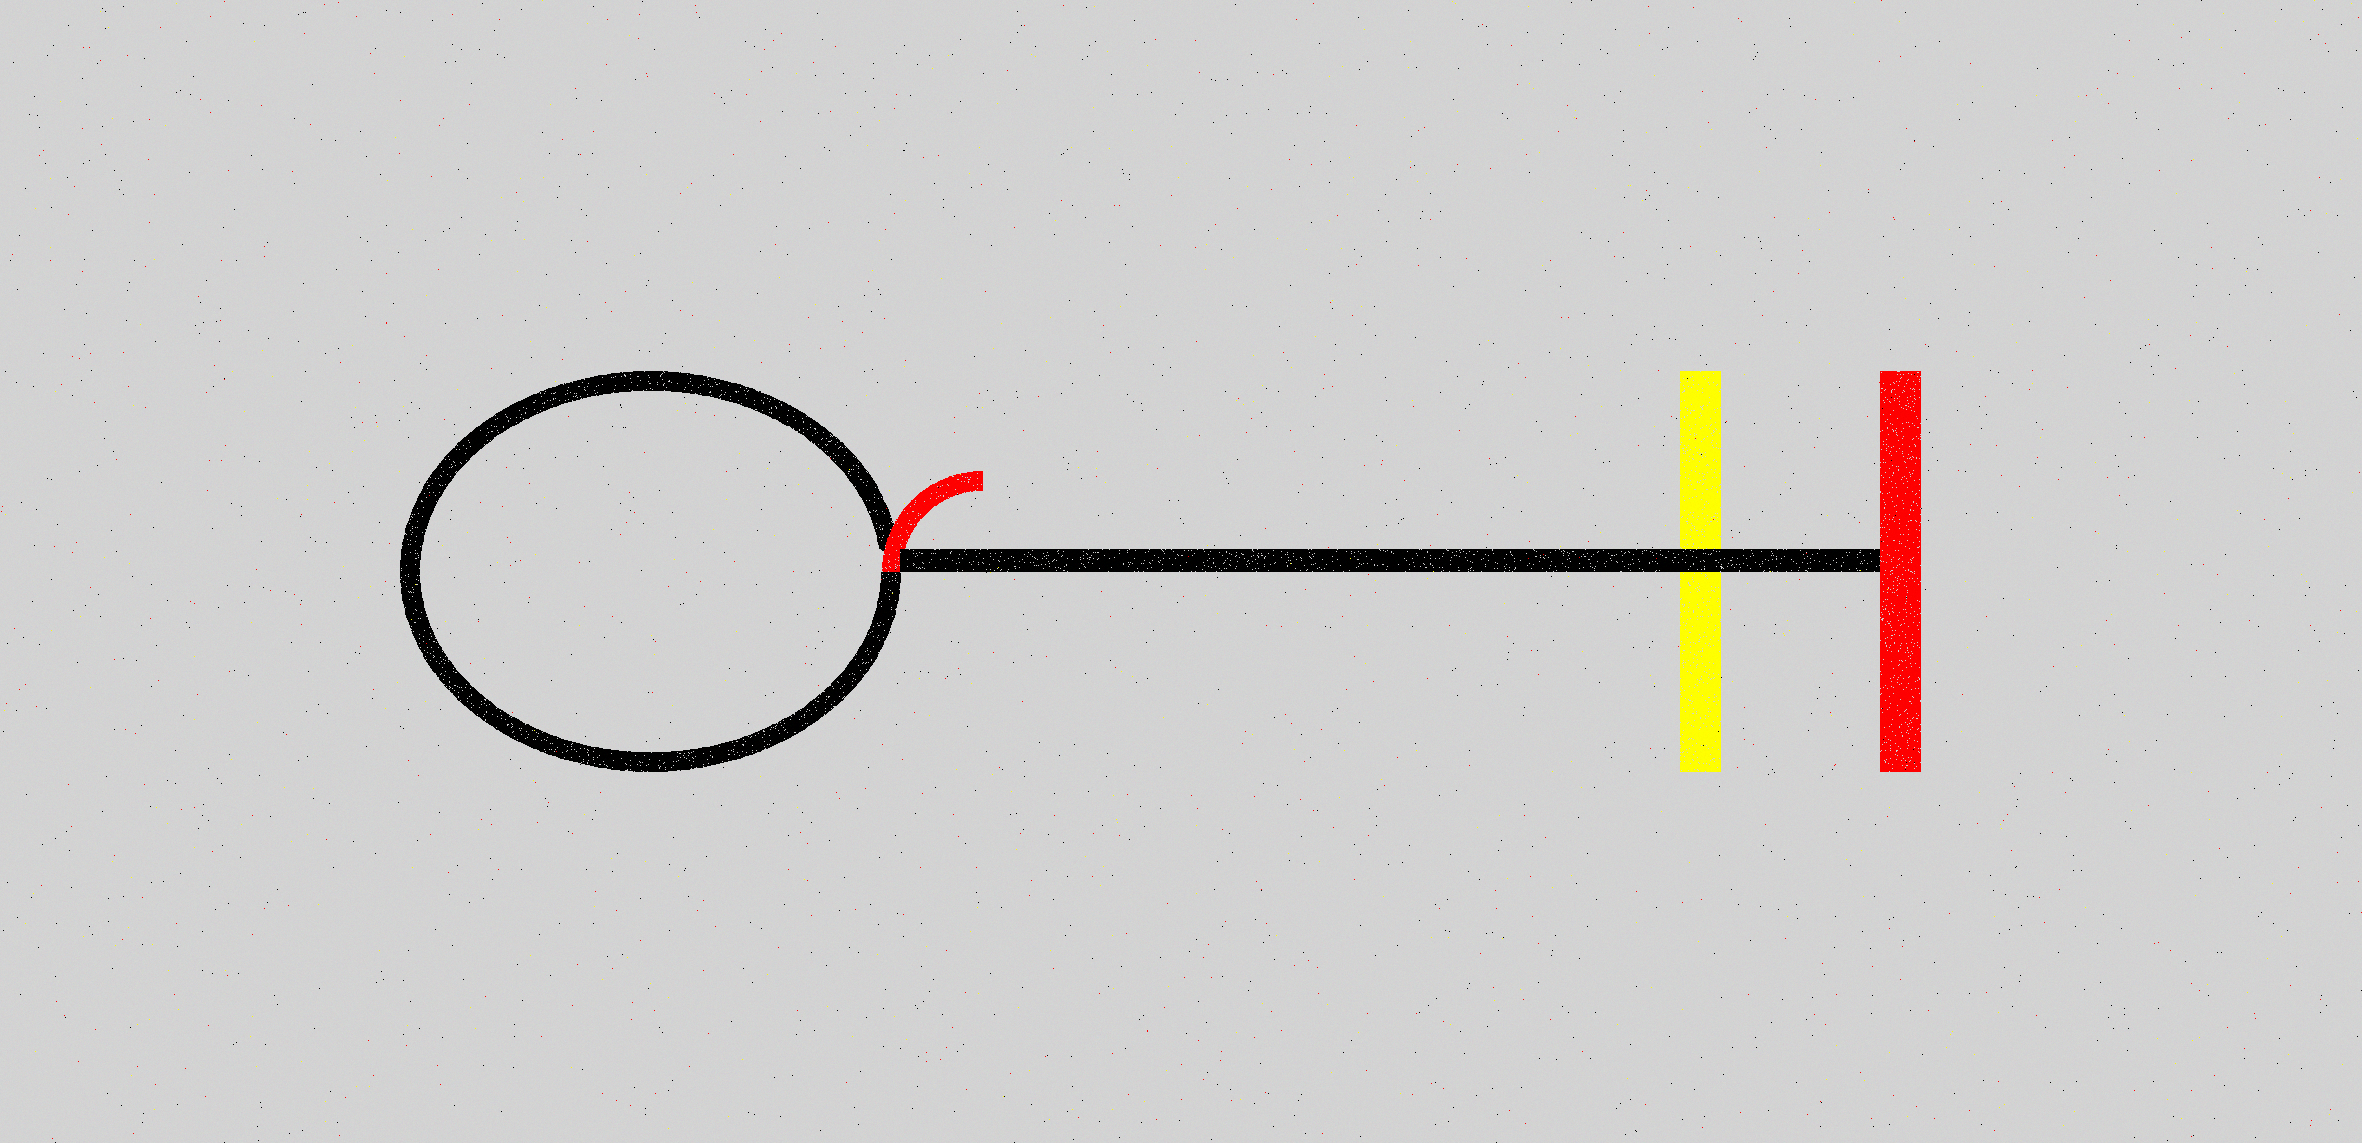

In [159]:
%pip install noisify
from noisify.recipes import human_error, machine_error
combined_noise = machine_error(20) + human_error(15)
[i for i in combined_noise(img)][0]

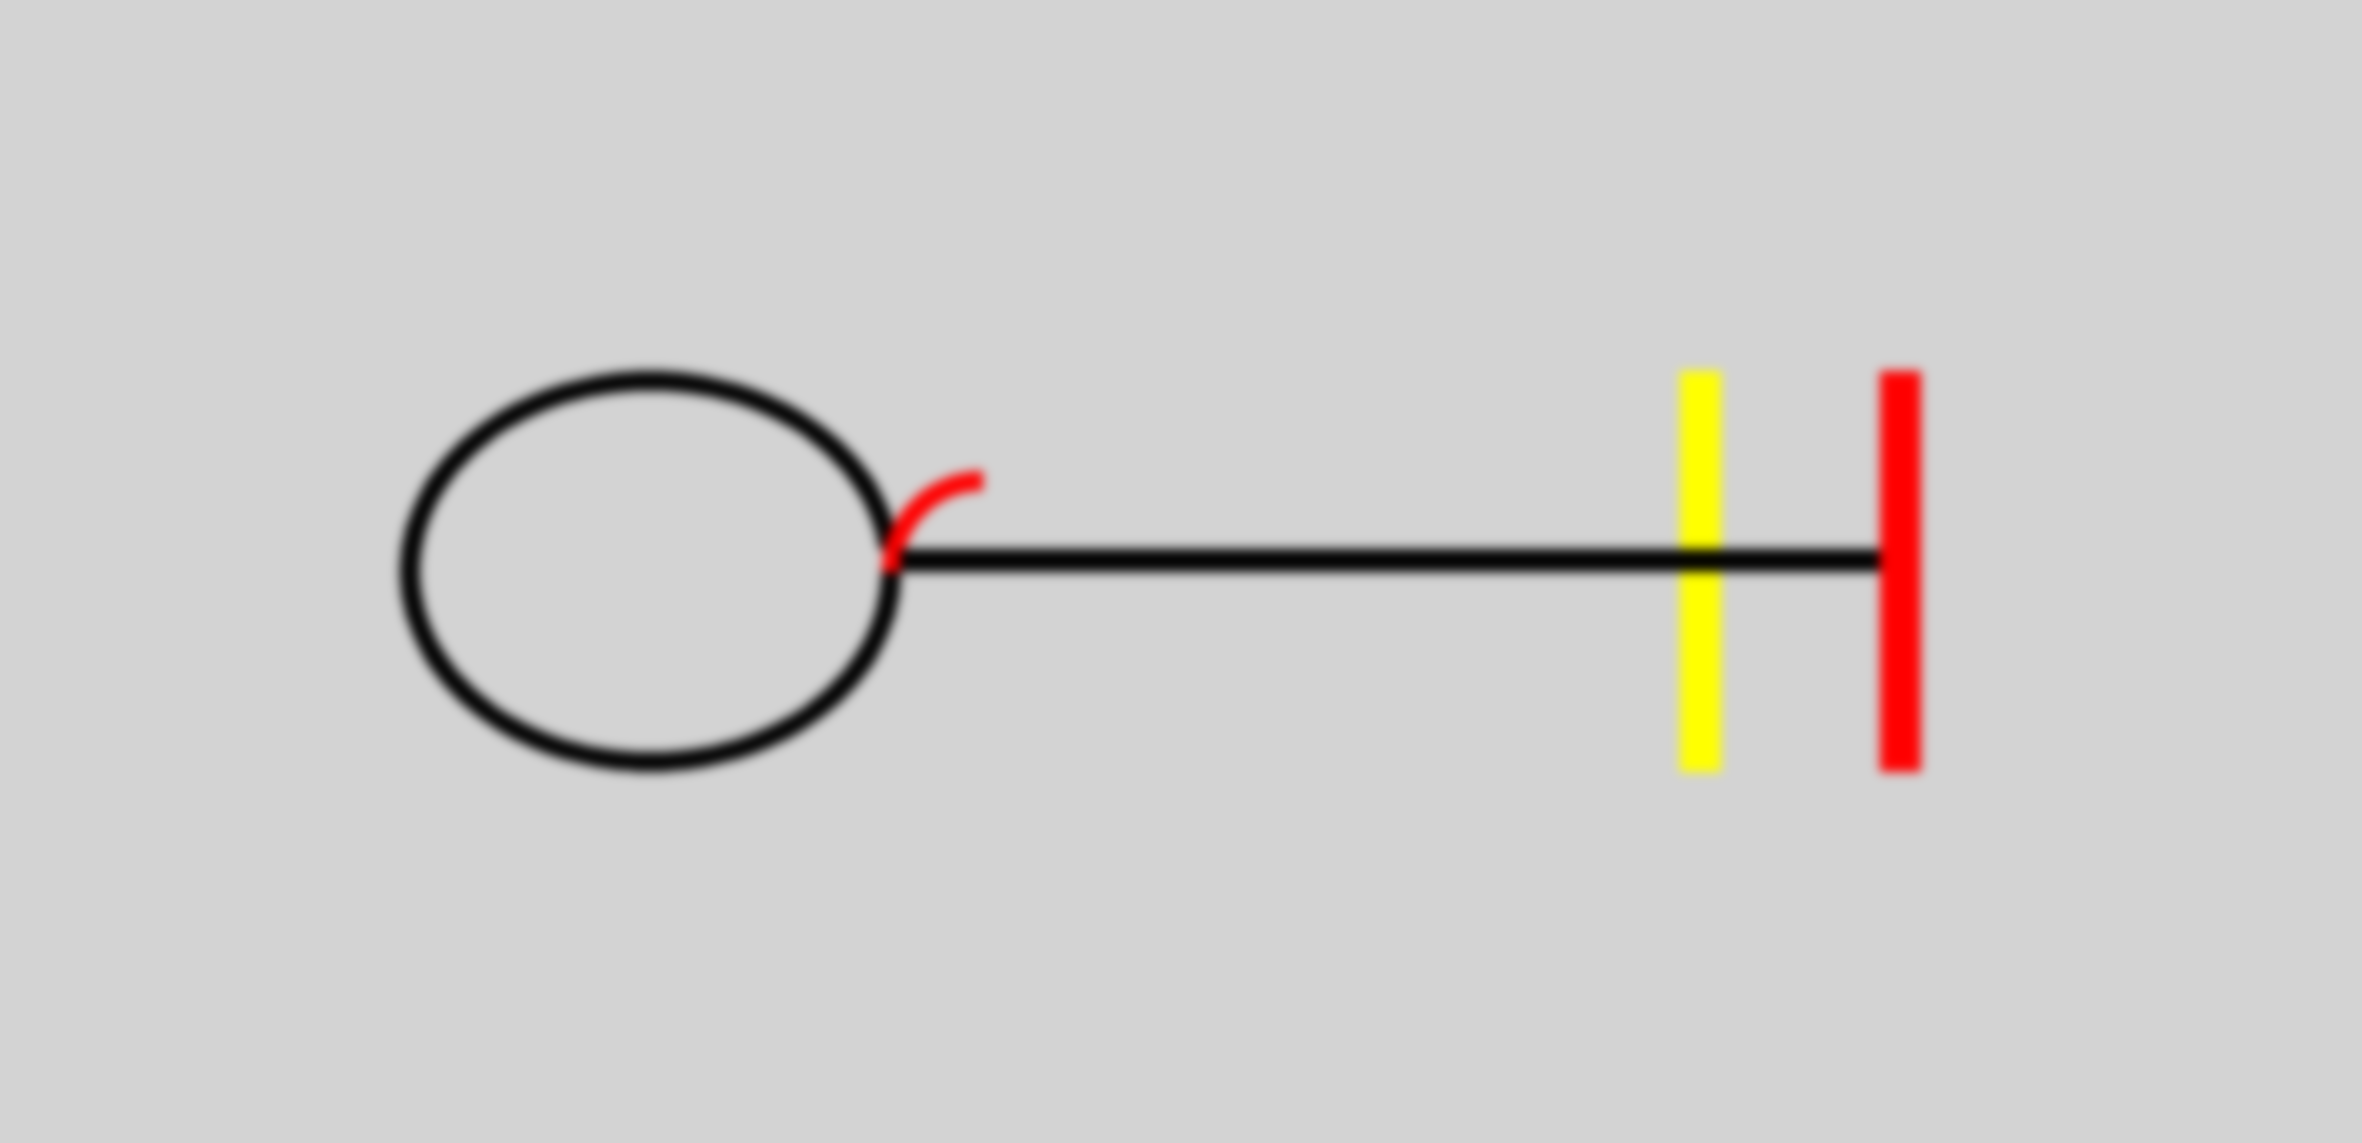

In [171]:
from PIL import ImageFilter
tmp = img
for i in range(10):
    tmp = tmp.filter(ImageFilter.BLUR) # BLUR, SMOOTH

tmp


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


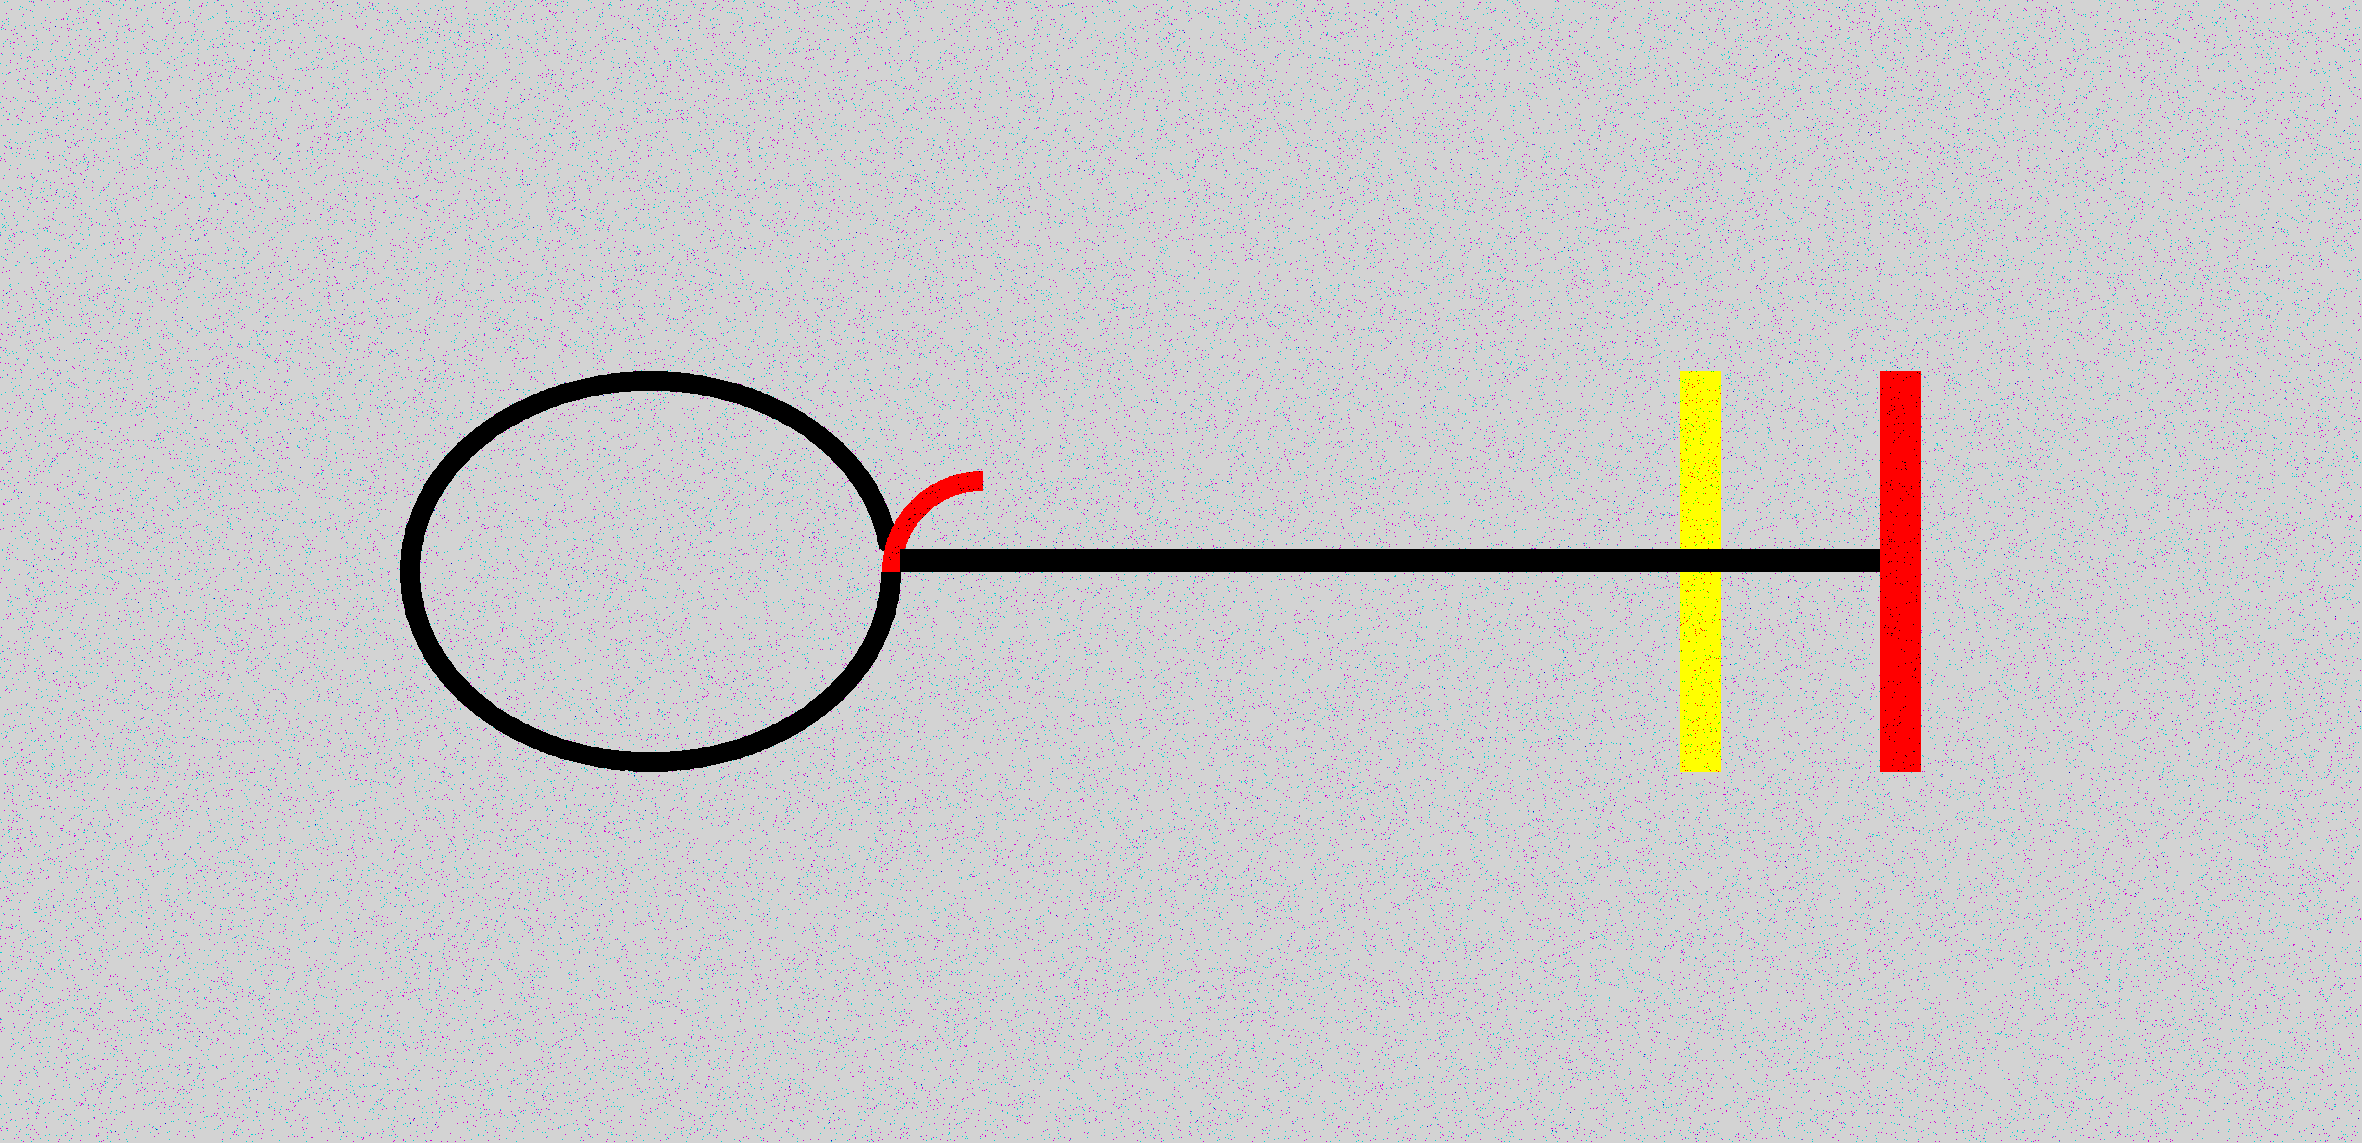

In [179]:
#https://stackoverflow.com/a/59991417/454773
import numpy as np
def add_salt_and_pepper(image, amount):

    output = np.copy(np.array(image))

    # add salt
    nb_salt = np.ceil(amount * output.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(nb_salt)) for i in output.shape]
    output[coords] = 1

    # add pepper
    nb_pepper = np.ceil(amount* output.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(nb_pepper)) for i in output.shape]
    output[coords] = 0

    return Image.fromarray(output)

add_salt_and_pepper(img,0.01)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


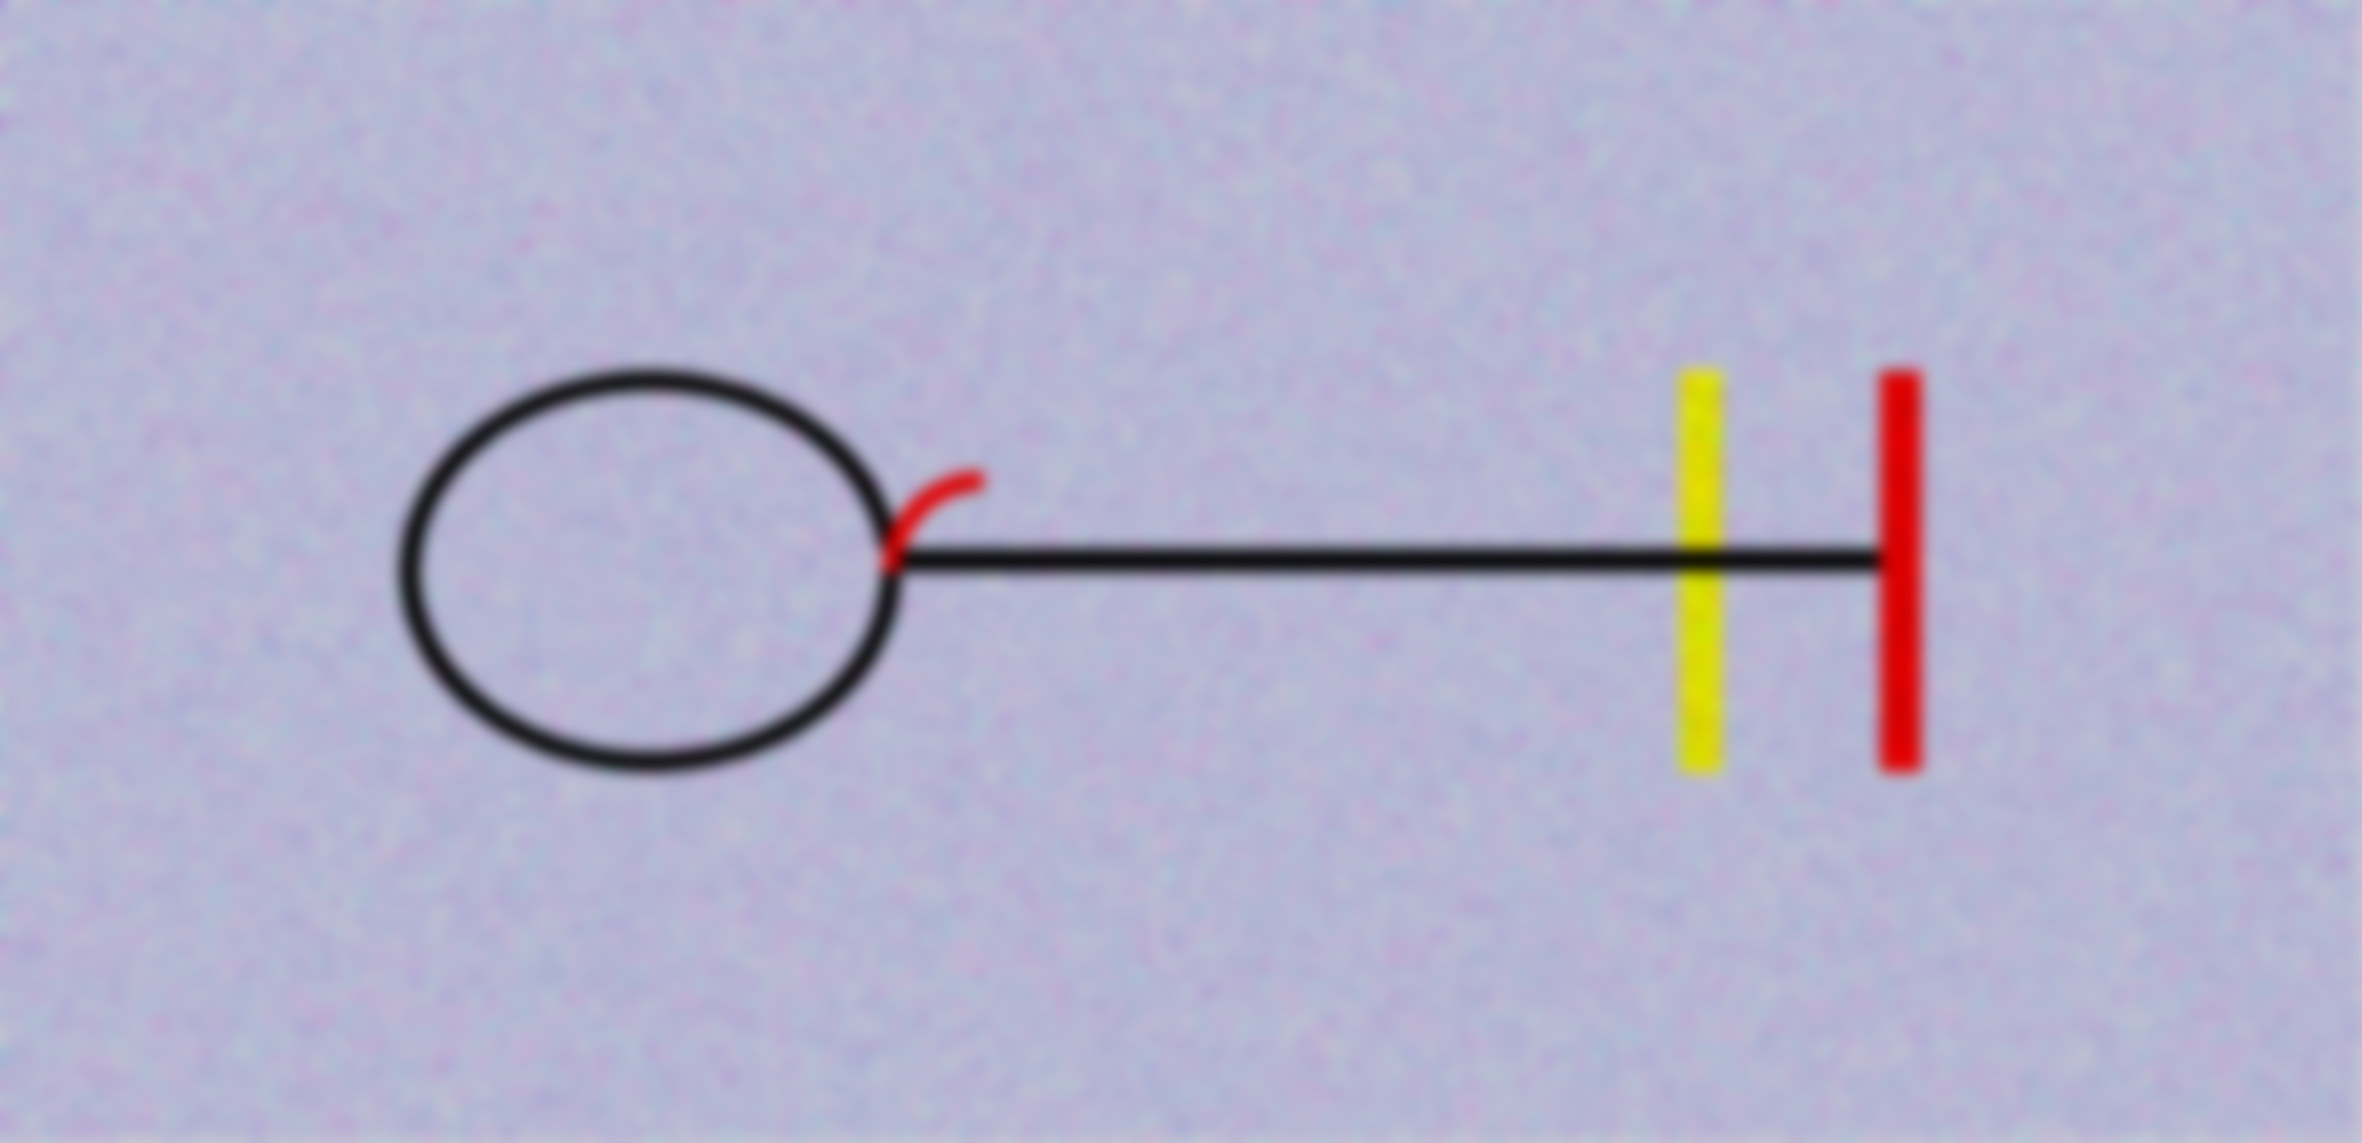

In [242]:
add_salt_and_pepper(img,0.1).filter(ImageFilter.GaussianBlur(7))

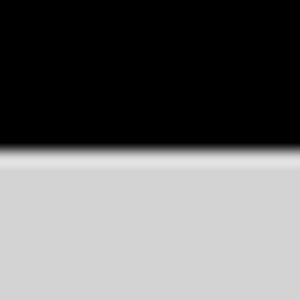

In [240]:
# Cropped image 
border = 10
start_x = inset+50
im1 = img.crop((start_x + eX/2 - border, y/2 - border, start_x + eX/2 + border, y/2+border)) 
resize = (300, 300) 
im1 = im1.resize(resize)  
im1 

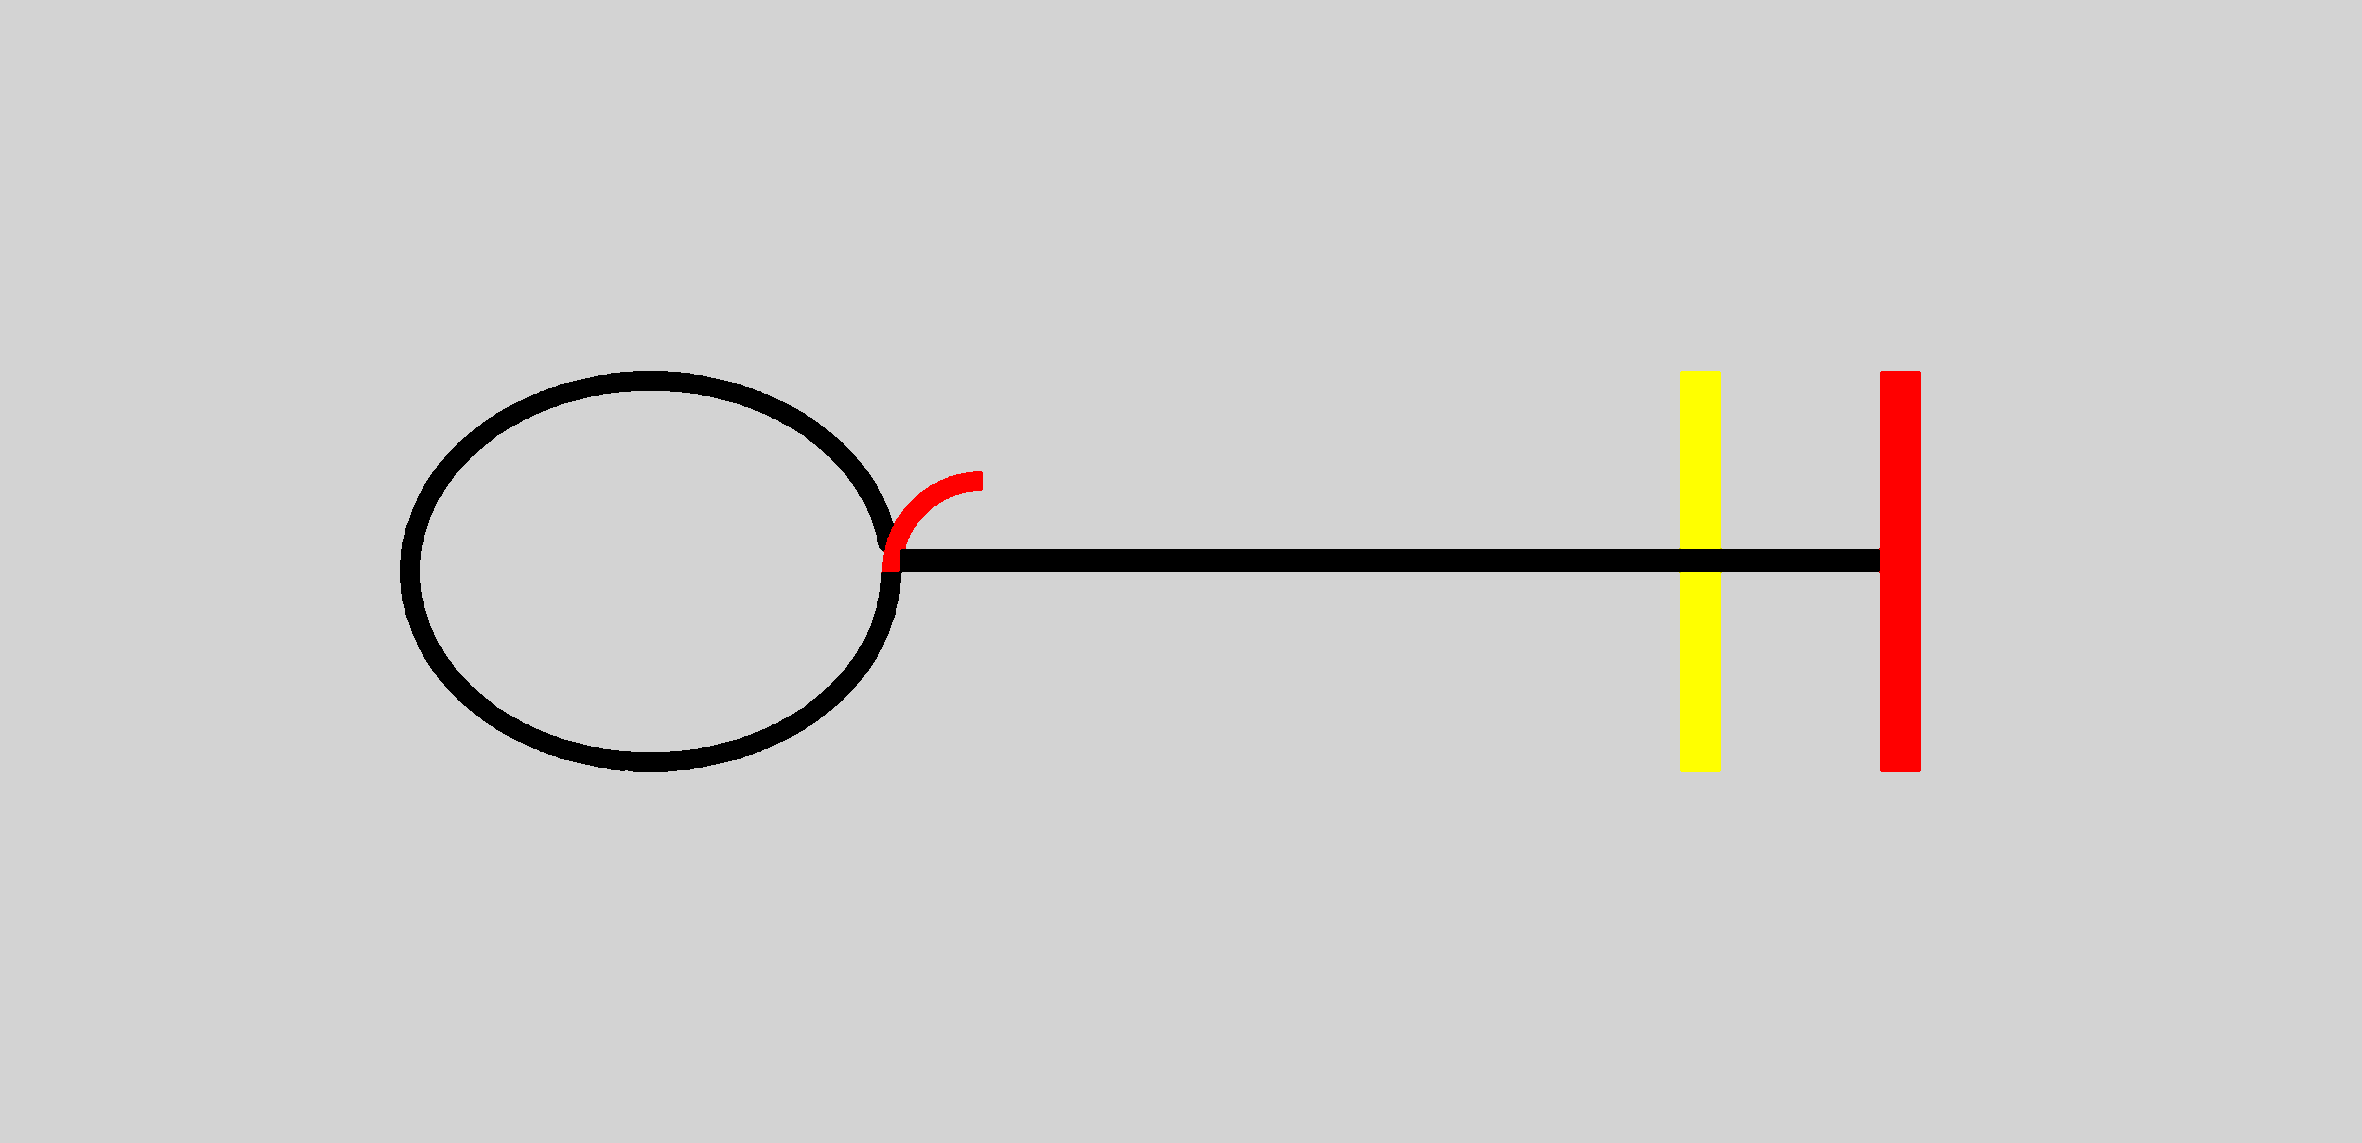

In [194]:
img.filter(ImageFilter.MedianFilter)

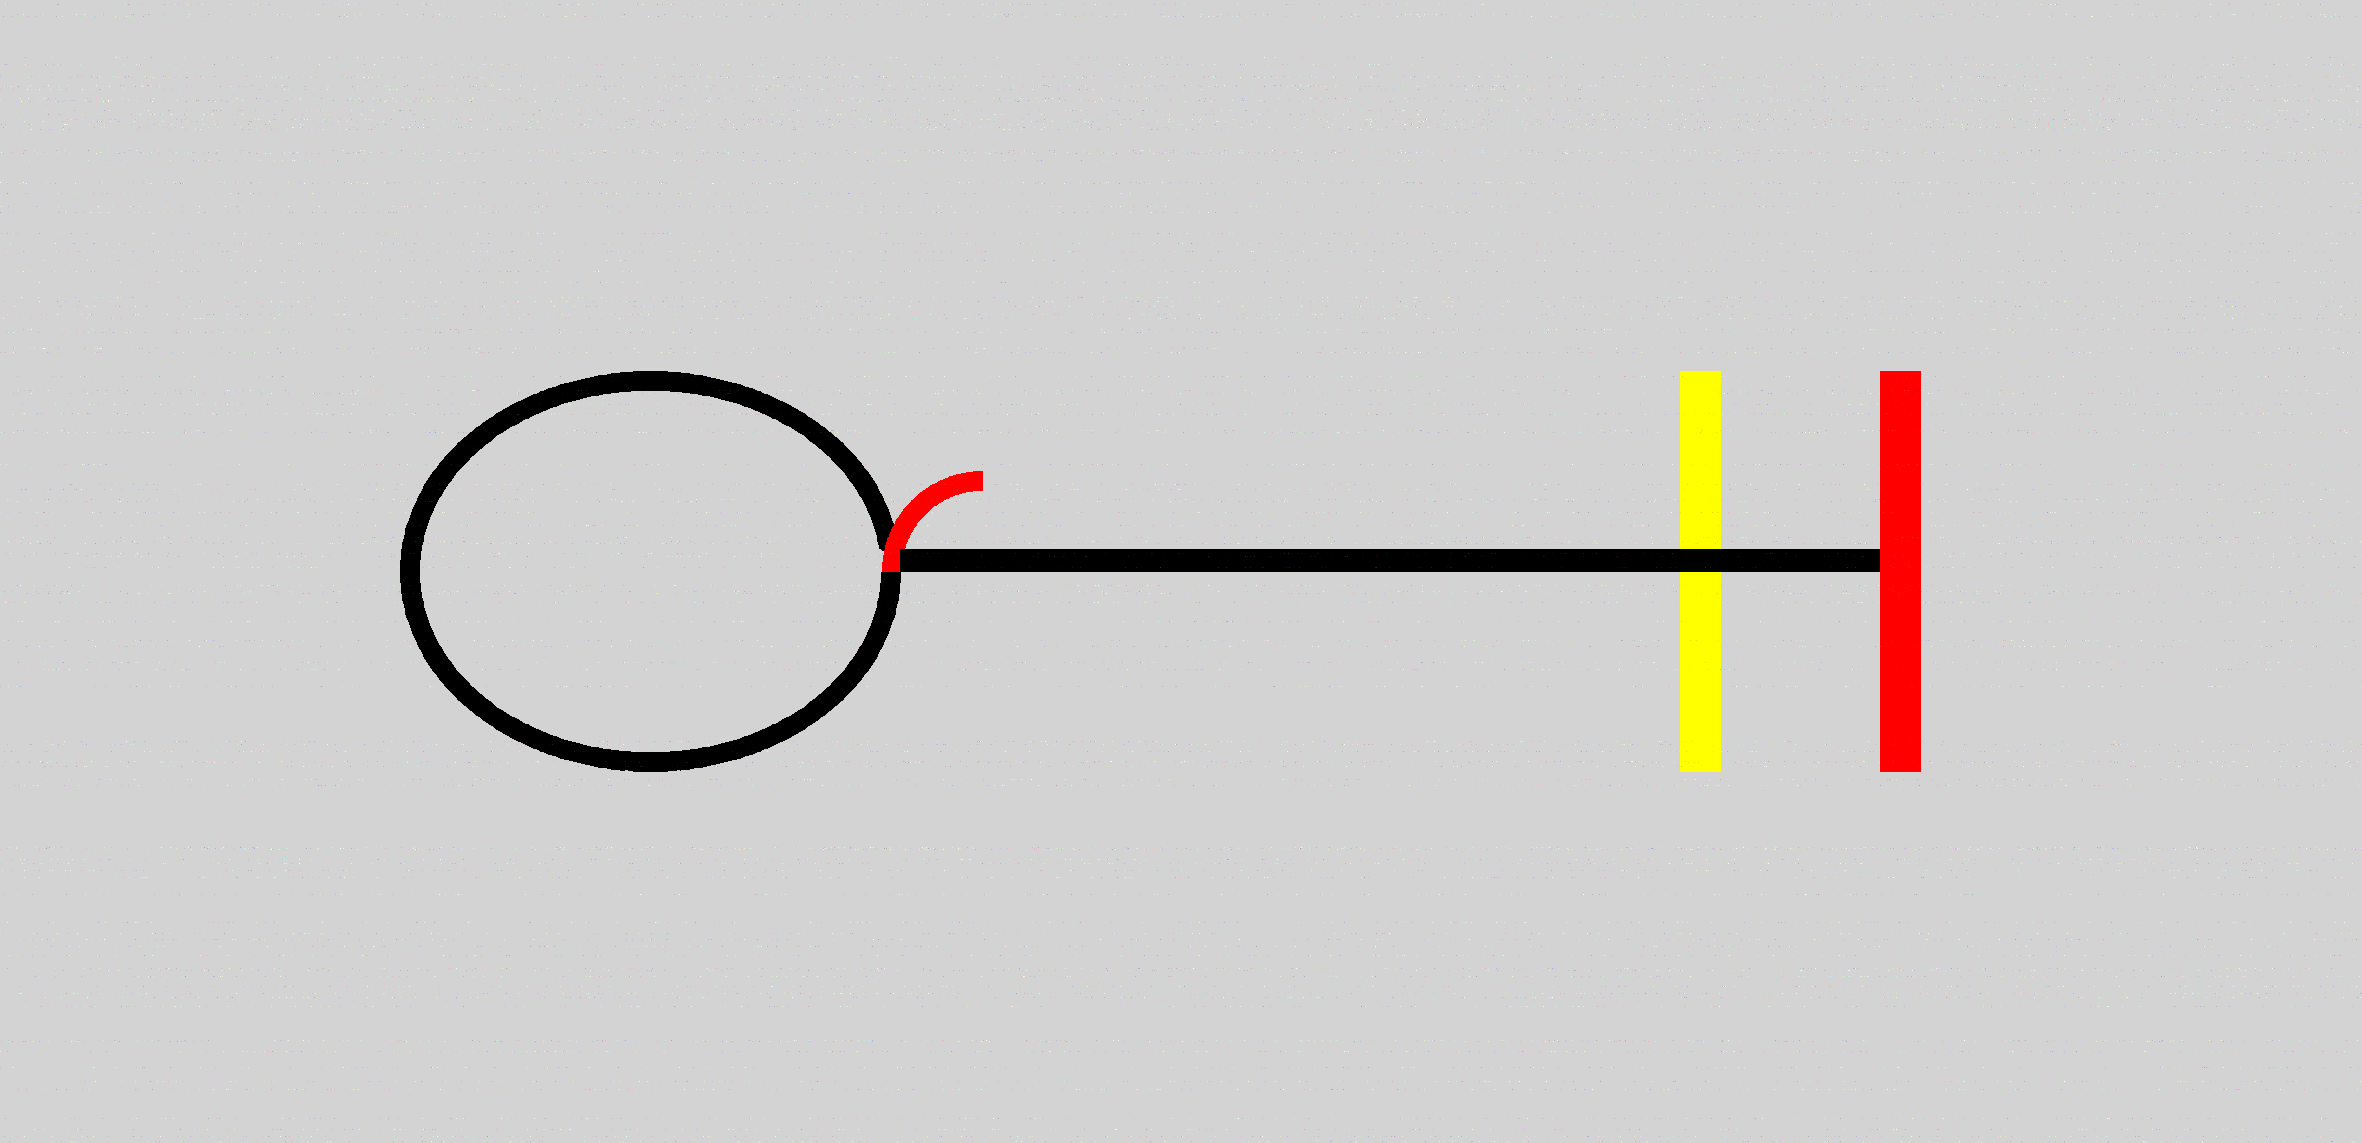

In [234]:

from tqdm.auto import trange
output = np.copy(np.array(img))
for i in trange(np.array(img).shape[0]):
    if np.random.random() < 0.1:
        for j in range(np.array(img).shape[1]):
            if np.random.random() < 0.1:
                for k in range(np.array(img).shape[2]):
                    output[i][j][k] = max(min(output[i][j][k]+np.random.randint(100)-50, 255), 0)
Image.fromarray(output)

## Sensor Diameter Test

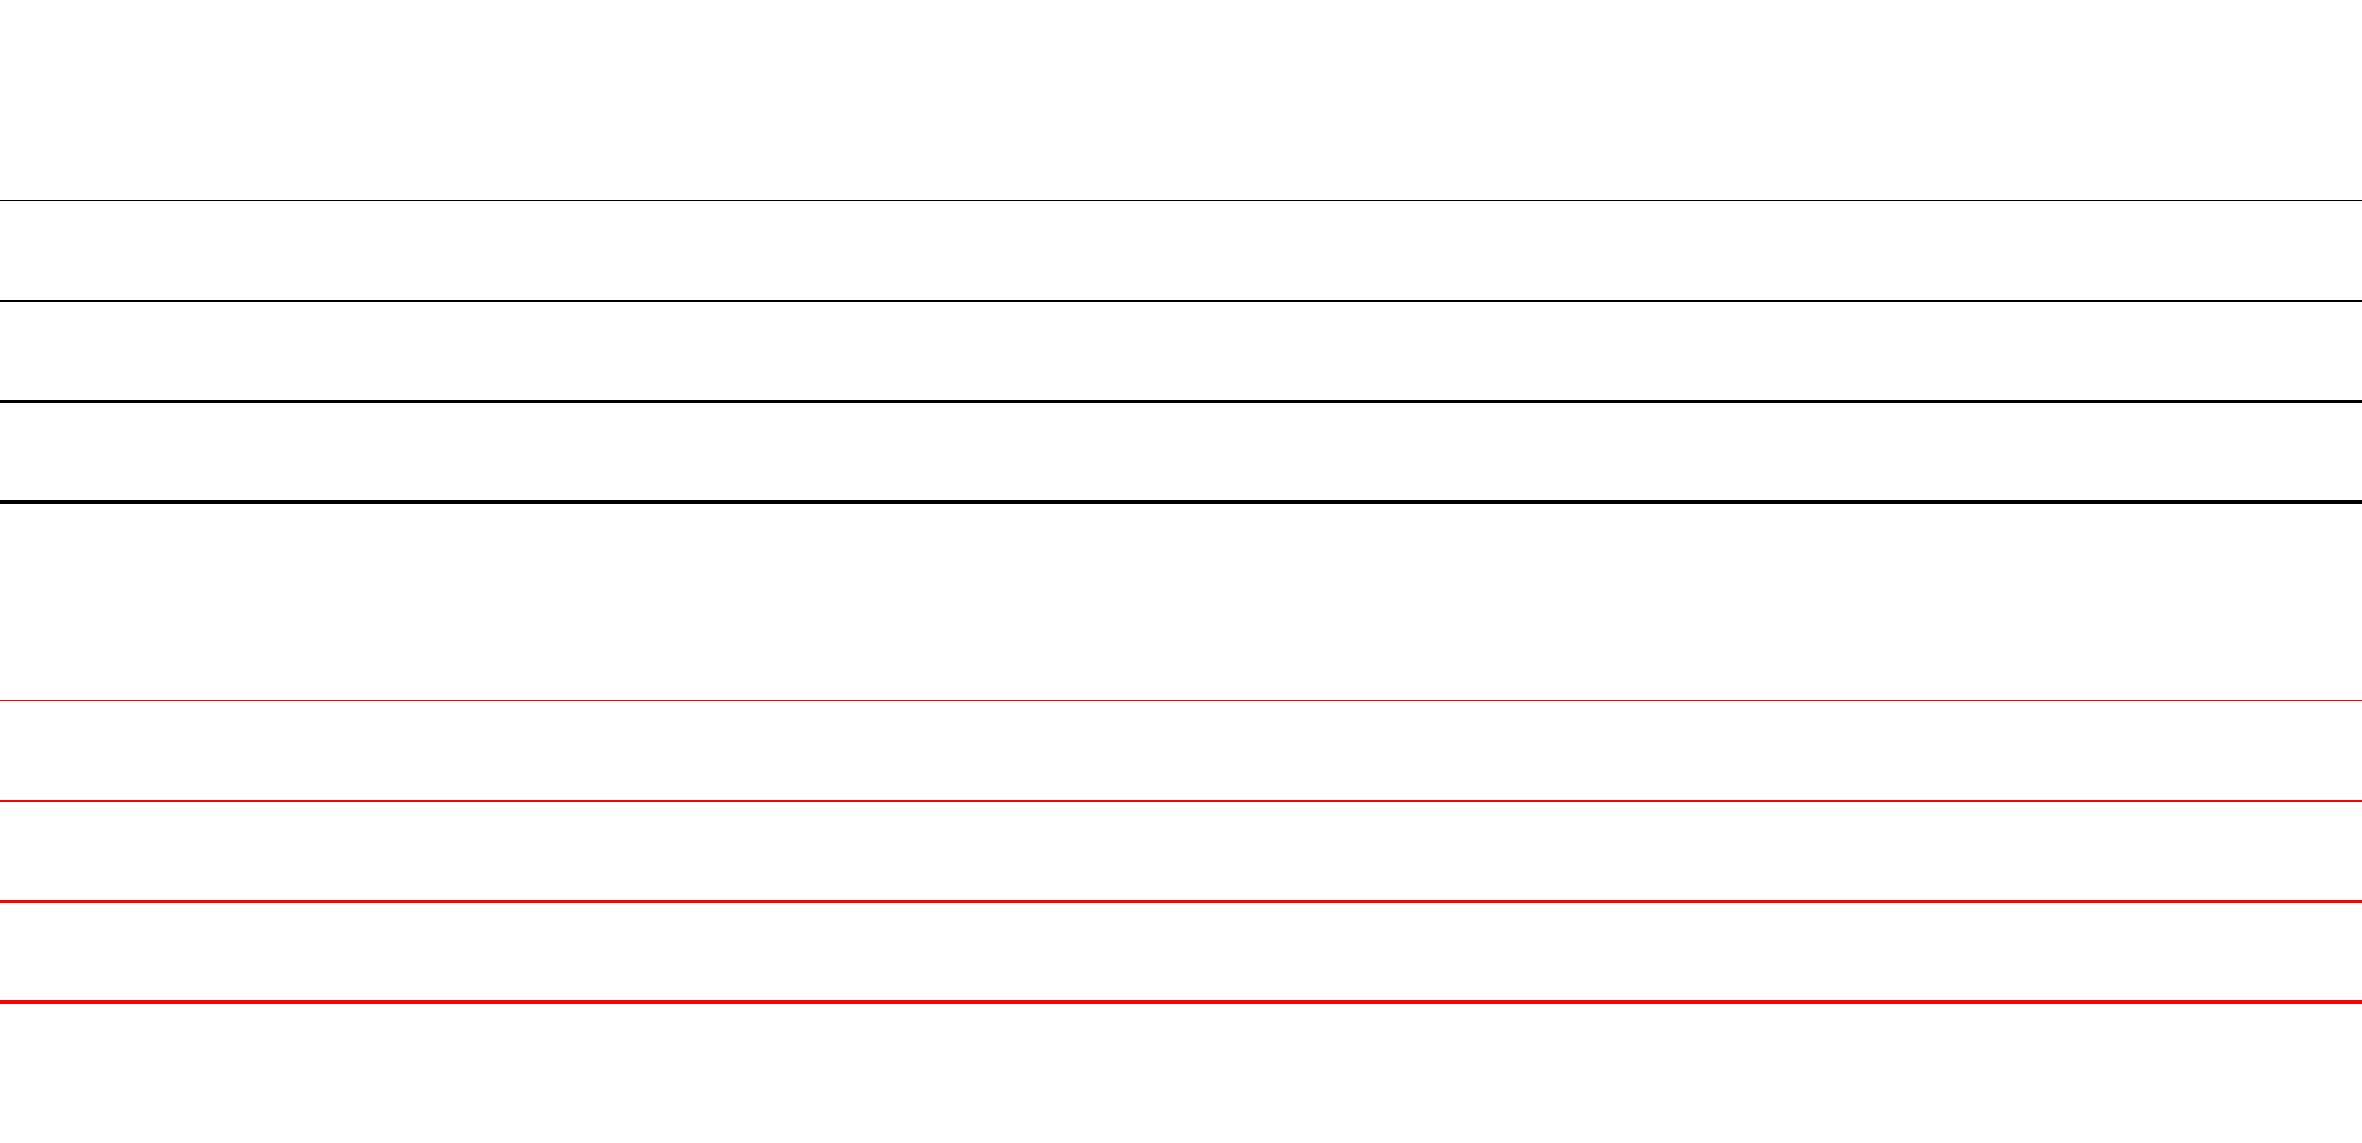

In [249]:
filename = '_sensor_diameter_test.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

_band_thickness = 1
_band_length = size[0]

_band_gap = 100

_band_x0 = 0
_band_y0 = 200

# In grey:
for i in range(4):
    _x = _band_x0 
    _y = _band_y0 + i*_band_gap
    draw.rectangle([(_x, _y),
                    (_x + _band_length, _y + i * _band_thickness)], fill='black')

# In red:

_band_y0 = _y + 2 * _band_gap

for i in range(4):
    _x = _band_x0 
    _y = _band_y0 + i*_band_gap
    draw.rectangle([(_x, _y),
                    (_x + _band_length, _y + i * _band_thickness)], fill='red')

    
img.save(filename)
I(filename)

## Tones

Example tones for use as various audio cues.

In [ ]:
from IPython.display import Javascript

In [ ]:
#via ??

## See also:
# https://marcgg.com/blog/2016/11/01/javascript-audio/
# https://css-tricks.com/introduction-web-audio-api/

tone='''
var context = new AudioContext()
var o = null
var g = null
document.addEventListener('DOMContentLoaded', function() {
    $(".js_play_sound").on("click", function(e) {
        e.preventDefault()
        var $target = $(e.target)
        eval($target.data("source"))
    })
    $(".js_stop_sound").on("click", function(e) {
        e.preventDefault()
        o.stop()
    })
}, false)

function example1() {
    o = context.createOscillator()
    o.type = "sine"
    o.connect(context.destination)
    o.start()
}

function example2() {
    o = context.createOscillator()
    g = context.createGain()
    o.connect(g)
    g.connect(context.destination)
    o.start(0)
}

function example2Stop(decreaseTime) {
    g.gain.exponentialRampToValueAtTime(0.00001, context.currentTime + decreaseTime)
}

function example3(type, x) {
    o = context.createOscillator()
    g = context.createGain()
    o.connect(g)
    o.type = type
    g.connect(context.destination)
    o.start(0)
    g.gain.exponentialRampToValueAtTime(0.00001, context.currentTime + x)
}

function example4(frequency, type) {
    o = context.createOscillator()
    g = context.createGain()
    o.type = type
    o.connect(g)
    o.frequency.value = frequency
    g.connect(context.destination)
    o.start(0)
    g.gain.exponentialRampToValueAtTime(0.00001, context.currentTime + 1)
}
'''

In [ ]:
# Bright success?
Javascript(tone+"example3('square', 1.5)")

In [ ]:
# Deeper fail?
Javascript(tone+"example4('50', 'sawtooth')")

## ChatBot Scripts

In [310]:
from chatterbot import ChatBot
chatbot = ChatBot("Test")
from IPython.display import clear_output
clear_output()

In [261]:
print(chatbot.get_response("Good morning!"))


Good morning!


In [262]:
print(chatbot.get_response("How are you today?"))

Good morning!


In [279]:
from chatterbot.trainers import ListTrainer

In [290]:
ChatBot?

In [307]:
chatbot = ChatBot('as');

UsageError: Line magic function `%capture` not found (But cell magic `%%capture` exists, did you mean that instead?).


In [298]:
dir(logging)

['BASIC_FORMAT',
 'BufferingFormatter',
 'CRITICAL',
 'DEBUG',
 'ERROR',
 'FATAL',
 'FileHandler',
 'Filter',
 'Filterer',
 'Formatter',
 'Handler',
 'INFO',
 'LogRecord',
 'Logger',
 'LoggerAdapter',
 'Manager',
 'NOTSET',
 'NullHandler',
 'PercentStyle',
 'PlaceHolder',
 'RootLogger',
 'StrFormatStyle',
 'StreamHandler',
 'StringTemplateStyle',
 'Template',
 'WARN',
 'WARNING',
 '_STYLES',
 '_StderrHandler',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__date__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__status__',
 '__version__',
 '_acquireLock',
 '_addHandlerRef',
 '_after_at_fork_child_reinit_locks',
 '_at_fork_reinit_lock_weakset',
 '_checkLevel',
 '_defaultFormatter',
 '_defaultLastResort',
 '_handlerList',
 '_handlers',
 '_levelToName',
 '_lock',
 '_logRecordFactory',
 '_loggerClass',
 '_nameToLevel',
 '_register_at_fork_reinit_lock',
 '_releaseLock',
 '_removeHandlerRef',
 '_showwarning',
 '_srcfile',
 '_

In [278]:
trainer = ListTrainer(chatbot)

trainer.train([
    "Hi, can I help you?",
    "Sure, I'd like to book a flight to Iceland.",
    "Your flight has been booked."
]
)

trainer.train([
    "Hello",
    "What time is it in France",
    "Quarter past twelve."
    "Is that the time?"
])

trainer.train([
    "Morning",
    "What time is it in Germany",
    "get a flight."
])

# Get a response to the input text 'I would like to book a flight.'
response = chatbot.get_response('Can I get a flight to Iceland?')

print(response)

List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



get a flight.
